<a href="https://colab.research.google.com/github/Bambillo1/NLP/blob/main/whatsapp_chat_group_analysis%2C_sentiment_analysis_and_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comprehensive Data Analysis on a WhatsApp Group Chat
##### *Author*: [Tushar Nankani](https://www.linkedin.com/in/tusharnankani/)

## *Overview*
- Introduction
- Data Retrieval & Preprocessing
- Exploratory Data Analysis
- Data Visualization
- Data Interpretation
- Summarizing the Inferences
- Conclusion

# *Introduction*:

Whatsapp has quickly become the world’s most popular text and voice messaging application. Specializing in cross-platform messaging with over 1.5 billion monthly active users, this makes it the most popular mobile messenger app worldwide.


- I thought of various projects on which I could analyse data like - *Air Quality Index* or The *cliched* *Covid-19 Data Analysis*.

- But I thought why not do **Data Analysis on a WhatsApp group chat** of *college students* and find out interesting insights about *who is most active, who are ghosts (the ones who do not reply), my sleep schedule,* *the most used emoji, the sentiment score of each person, who swears the most, the most actives times of the day, or does the group use phones during college teaching hours?*

- These would be some interesting insights for sure, more for me than for you, since the people in this chat are people I know personally.


## Beginning. How do I export my conversations? From Where To Obtain Data?

- The first step is **Data Retrieval & Preprocessing**, that is to **gather the data**. WhatsApp allows you to **export your chats** through a **.txt format**.

- Go to the respective chat, which you want to export!

<img src="https://imgur.com/lYd4A4J.png" width=200 length=200 align="center">
<!-- ![](https://imgur.com/lYd4A4J) -->

- Tap on **options**, click on **More**, and **Export Chat.**

<img src="https://imgur.com/KD0vCs1.png" width=200 length=200 align="center">
<!-- ![](https://imgur.com/KD0vCs1.png) -->

- I will be Exporting **Without Media.**

#### NOTE:
- Without media: exports about **40k messages **
- With media: exports about *10k messages along with pictures/videos*
- While exporting data, *avoid including media files* because if the number of media files is greater than certain figure then not all the media files are exported.

<img src="https://imgur.com/BlQx2dl.png" width=300 length=300 align="center">
<!-- ![](https://imgur.com/BlQx2dl) -->

## Opening this .txt file up, you get messages in a format that looks like this:

![](https://imgur.com/EINDP1F.png)


# *Importing Necessary Libraries*

We will be using :
1. **Regex (re)** to extract and manipulate strings based on specific patterns.
    - References:
        - [Regex - Python Docs](https://docs.python.org/3/library/re.html)
        - [Regex cheatsheet](https://www.rexegg.com/regex-quickstart.html)
        - [Regex Test - live](https://regexr.com/)
        - [Datetime Format](http://strftime.org/)
2. **pandas** for analysis.
3. **matlotlib** and **seaborn** for visualization.
4. **emoji** to deal with emojis.
    - References:
        - [Python Docs](https://pypi.org/project/emoji/)
        - [Emoji](https://github.com/carpedm20/emoji)
        - [EMOJI CHEAT SHEET](https://www.webfx.com/tools/emoji-cheat-sheet/)
5. **wordcloud** for the most used words.

In [3]:
!pip install stylecloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.1/262.1 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.4/161.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259494 sha256=b8ec0f924f5e4d25d8428d091d0c7921f5bc14d5e796a68ad404608dc01d3340
  Stored in directory: /root/.cache/pip/wheels/aa/c8/27/9374f4fc7133015d902b5e2c75ad951edd57eb1ae948495915
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=a82bd802497ab6f00e49055e97e3ca4980870dcea32ce945962b422e6f8b5b17
  Stored in directory: /root/.cache/pip/wheels/d6/6d

In [4]:
!pip install emot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 1.8 MB/s eta 0:00:00


In [5]:
!pip install emoji
import re
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import itertools
from collections import Counter
import warnings

import emot
import os
import re
import stylecloud
%matplotlib inline
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.1 MB/s eta 0:00:00


##### NOTE:
- This special command `%matplotlib inline` to ensure that plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows.
- `warnings.filterwarnings('ignore')`: The warnings filter controls whether warnings are ignored, displayed, or turned into errors (raising an exception). [REFERENCE](https://docs.python.org/3/library/warnings.html)

## *Preparation and reading data*

In [6]:
import pandas as pd
import re

def rawToDf(file, key):
    '''Converts raw .txt file into a Data Frame'''

    split_formats = {
        '12hr' : r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '12hr_nbsp' : r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\u202F-\s',
        '24hr' : r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%d/%m/%Y, %I:%M %p - ',
        '12hr_nbsp' : '%d/%m/%Y, %I:%M %p\u202F- ',
        '24hr' : '%d/%m/%Y, %H:%M - ',
        'custom': ''
    }

    with open(file, 'r', encoding='utf-8') as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string)[1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns

        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df

    # Handling different date formats in the data
    def parse_date(date_str):
        for fmt in ['%d/%m/%Y, %I:%M %p - ', '%m/%d/%y, %I:%M %p - ', '%d/%m/%y, %I:%M %p - ']:
            try:
                return pd.to_datetime(date_str, format=fmt)
            except ValueError:
                continue
        raise ValueError(f"time data '{date_str}' does not match any expected format")

    # converting date-time pattern which is of type String to type datetime,
    df['date_time'] = df['date_time'].apply(parse_date)

    # split user and msg
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split(r'([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and splitting it aka each msg from a user
        if a[1:]: # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("group_notification")
            msgs.append(a[0])

    # creating new columns
    df['user'] = usernames
    df['message'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)

    return df

# Use the function with the correct format key
df = rawToDf('whatsapp-chat-data.txt', '12hr')
print(df.head())


            date_time                user  \
0 2020-01-26 16:19:00  group_notification   
1 2020-01-24 20:25:00  group_notification   
2 2020-01-26 16:19:00  group_notification   
3 2020-01-26 16:20:00  group_notification   
4 2020-01-26 16:20:00  group_notification   

                                             message  
0  Messages and calls are end-to-end encrypted. N...  
1  Tanay Kamath (TSEC, CS) created group "CODERS👨...  
2         You joined using this group's invite link   
3  +91 99871 38558 joined using this group's invi...  
4  +91 91680 38866 joined using this group's invi...  


#### *NOTE*:
- Since WhatsApp texts are *multi-line*, you cannot just read the file line by line and get each message that you want. Instead, you need a way to *identify* if a line is a new message or part of an old message. You could use regular expressions.
- While reading each line, I split it based on a comma and take the first item returned from the `split()` function. If the line is a new message, the first item would be a valid date, and it will be appended as a new message to the list of messages. If it’s not, the message is part of the previous message, and hence, will be appended to the end of the previous message as one continuous message.

## *Prior Information of my Whatsapp Data*
- This is my most active college coding group.
- It has **235+** participants; 237 to be precise.
- This group was made in **January 2020.**

## Pre-Processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  13655 non-null  datetime64[ns]
 1   user       13655 non-null  object        
 2   message    13655 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 320.2+ KB


### The dataset contains 3 rows, and 13655 respective entries.
- Here is how it looks like:

In [8]:
df.sample(10)

date_time                        user  \
2503  2020-02-29 22:56:00   Darshan Rander (TSEC, IT)   
1862  2020-02-23 12:11:00  Dheeraj Lalwani (TSEC, CS)   
1057  2020-02-20 22:40:00  Dheeraj Lalwani (TSEC, CS)   
2962  2020-03-12 12:23:00      Pratik K (TSEC CS, SE)   
10914 2020-08-27 21:58:00  Dheeraj Lalwani (TSEC, CS)   
12434 2020-09-18 12:25:00   Darshan Rander (TSEC, IT)   
11795 2020-09-13 11:23:00             +91 97739 65140   
12617 2020-09-20 14:33:00             +91 98337 26449   
8857  2020-07-13 18:15:00             +91 80979 84068   
11794 2020-09-13 11:21:00  Dheeraj Lalwani (TSEC, CS)   

                                                 message  
2503                                Mujhe laga hojayega   
1862                                      Still nothing   
1057                                            Alright   
2962                   Volunteering won't get you a job   
10914  If it's true, RIP Yash.  1 like = 1 pray for Y...  
12434                        Atleast voh samjhega mujhe   
11795                                                 😂   
12617                                          Were men   
8857                                                      
11794                                      Massssst hai

### An important observation
- One might wonder there are no NaNs, but as you can see, there are some rows, where messages are an *empty string.*
- This can be because, the message might just contain **emojis.**
#### To see, how many such rows are there, we can use `df[df['message'] == ""].shape[0]`

In [9]:
df[df['message'] == ""].shape[0]

538

## Adding extra *helper columns for analysis and visualization*

In [10]:
df['day'] = df['date_time'].dt.strftime('%a')
df['month'] = df['date_time'].dt.strftime('%b')
df['year'] = df['date_time'].dt.year
df['date'] = df['date_time'].apply(lambda x: x.date())

# Now that we have a clean DataFrame to work with, it’s time to perform analysis on it.
### Final Data Frame

In [11]:
df

date_time                        user  \
0     2020-01-26 16:19:00          group_notification   
1     2020-01-24 20:25:00          group_notification   
2     2020-01-26 16:19:00          group_notification   
3     2020-01-26 16:20:00          group_notification   
4     2020-01-26 16:20:00          group_notification   
...                   ...                         ...   
13650 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13651 2020-10-02 02:05:00   Darshan Rander (TSEC, IT)   
13652 2020-10-02 02:11:00     Tanay Kamath (TSEC, CS)   
13653 2020-10-02 02:28:00   Darshan Rander (TSEC, IT)   
13654 2020-10-02 10:13:00  Dheeraj Lalwani (TSEC, CS)   

                                                 message  day month  year  \
0      Messages and calls are end-to-end encrypted. N...  Sun   Jan  2020   
1      Tanay Kamath (TSEC, CS) created group "CODERS👨...  Fri   Jan  2020   
2             You joined using this group's invite link   Sun   Jan  2020   
3      +91 99871 38558 joined using this group's invi...  Sun   Jan  2020   
4      +91 91680 38866 joined using this group's invi...  Sun   Jan  2020   
...                                                  ...  ...   ...   ...   
13650                                    MCQs mark kiya   Fri   Oct  2020   
13651                                    Sign-in kiya😂😅   Fri   Oct  2020   
13652                                  Incognito se na?   Fri   Oct  2020   
13653                                               Yup   Fri   Oct  2020   
13654  guys, please do me a favor and vote in this po...  Fri   Oct  2020   

             date  
0      2020-01-26  
1      2020-01-24  
2      2020-01-26  
3      2020-01-26  
4      2020-01-26  
...           ...  
13650  2020-10-02  
13651  2020-10-02  
13652  2020-10-02  
13653  2020-10-02  
13654  2020-10-02  

[13655 rows x 7 columns]

# *Data Analysis*

**1. Overall frequency of total messages on the group.**

**2. Top 10 most active days.**

**3. Top 10 active users on the group (with a twist).**
- Ghosts present in the group. (shocking results.)

**4. Top 10 users most sent media.**

**5. Top 10 most used emojis.**

**6. Most active hours and days.**
 - Heatmaps of weekdays and months.
 - Most active hours, weekdays, and months.

**7. Most used words - WordCloud**

# 1. Overall frequency of total messages on the group.
- I will first do this to get a look at overall data.

I will plot a simple line graph to see the frequency of messages over the months.
##### I expect to see a nice line graph with crests and troughs in odd places.

In [12]:
import pandas as pd

# Assuming df is your original DataFrame and it has a 'date' column of datetime type.
df1 = df.copy()  # Make a copy of the original DataFrame to avoid data loss
df1['message_count'] = 1  # Add a helper column for counting messages
df1.drop(columns='year', inplace=True)  # Drop unnecessary 'year' column

# Ensure 'date' is in datetime format if not already
df1['date'] = pd.to_datetime(df1['date'])

# Group by 'date' and sum only the numerical columns
df1 = df1.groupby('date').agg({'message_count': 'sum'}).reset_index()

# Display the resulting DataFrame
print(df1)


          date  message_count
0   2020-01-24              1
1   2020-01-26            105
2   2020-01-27             90
3   2020-01-28            126
4   2020-01-29            118
..         ...            ...
237 2020-09-28            144
238 2020-09-29             49
239 2020-09-30            167
240 2020-10-01             91
241 2020-10-02             22

[242 rows x 2 columns]


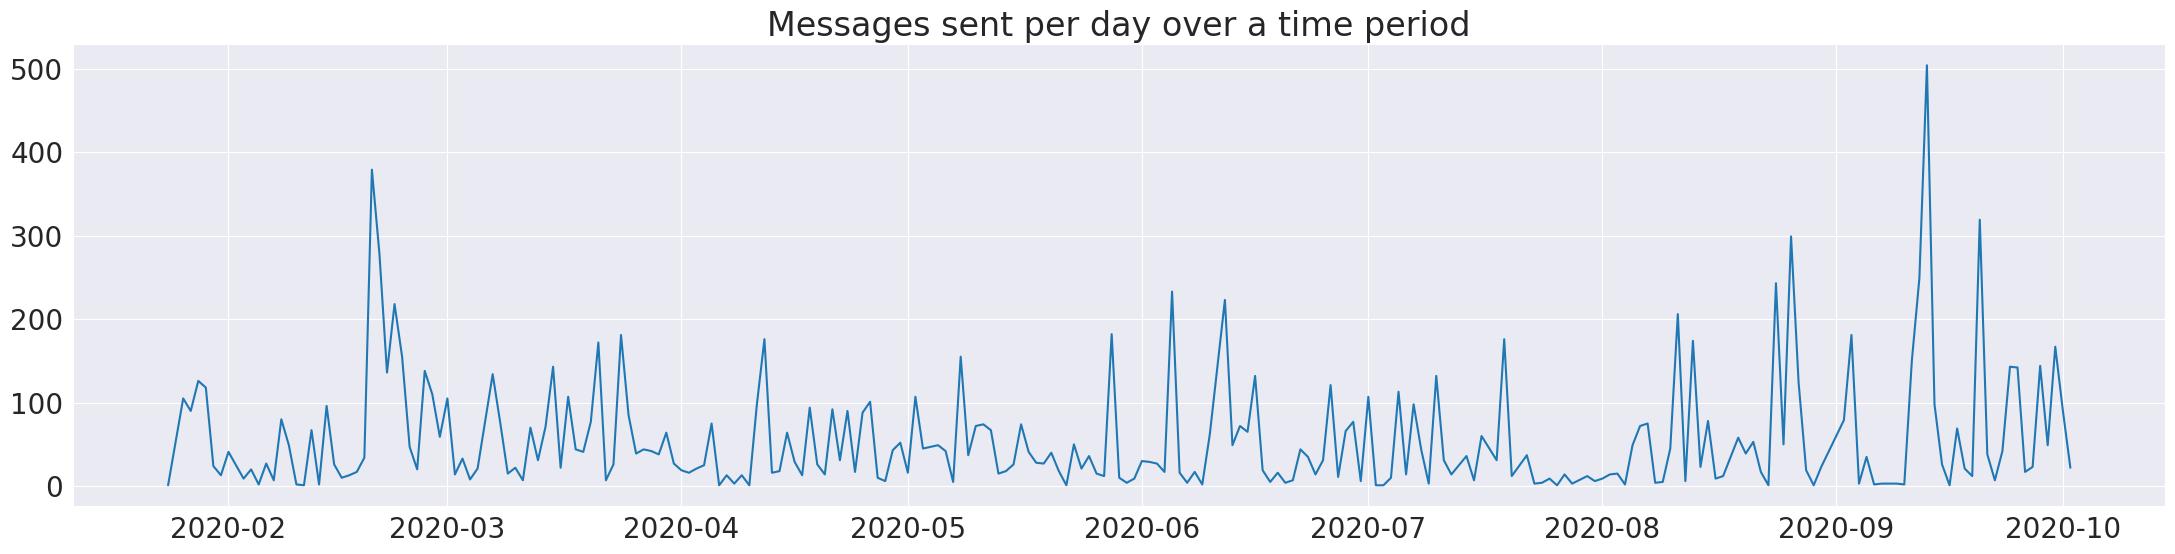

In [13]:
# Improving Default Styles using Seaborn
sns.set_style("darkgrid")

# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (27, 6)      # Same as `plt.figure(figsize = (27, 6))`


# A basic plot
plt.plot(df1.date, df1.message_count)
plt.title('Messages sent per day over a time period');

# Could have used Seaborn's lineplot as well.
# sns.lineplot(df1.date, df1.message_count);


# Saving the plots
plt.savefig('msg_plots.svg', format = 'svg')

# 2 *Top 10 most active days.*

In [14]:
top10days = df1.sort_values(by="message_count", ascending=False).head(10)    # Sort values according to the number of messages per day.
top10days.reset_index(inplace=True)           # reset index in order.
top10days.drop(columns="index", inplace=True) # dropping original indices.
top10days

date  message_count
0 2020-09-13            504
1 2020-02-20            379
2 2020-09-20            319
3 2020-08-26            299
4 2020-02-21            278
5 2020-09-12            249
6 2020-08-24            243
7 2020-06-05            233
8 2020-06-12            223
9 2020-02-23            218

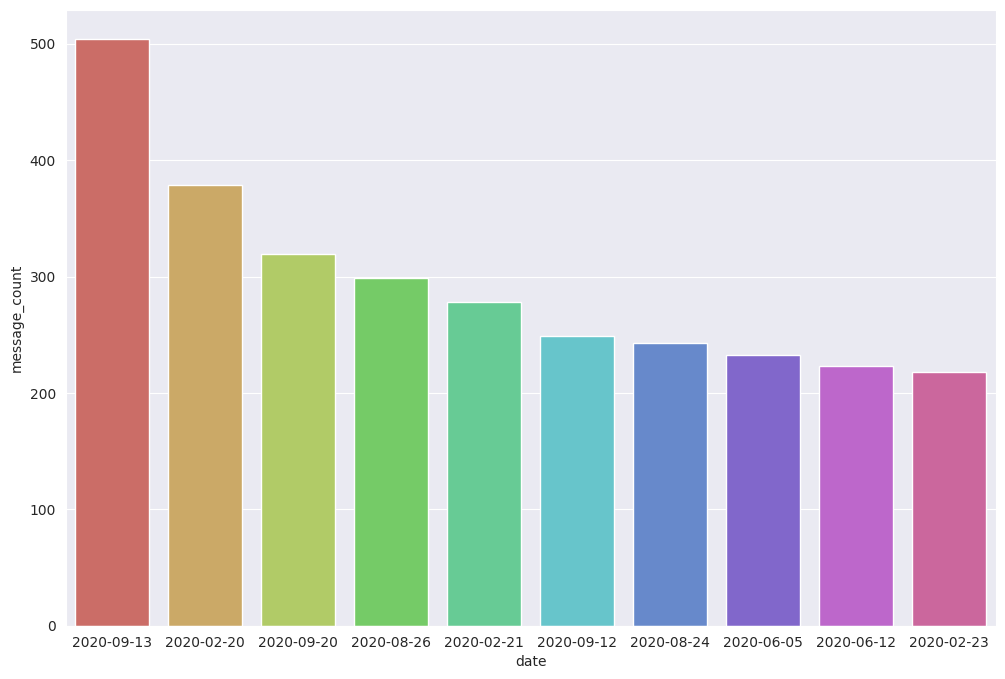

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improving default styles using Seaborn
sns.set_style("darkgrid")

# For better readability
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Create a bar plot for top 10 days
sns.barplot(x='date', y='message_count', data=top10days, palette="hls")

# Saving the plot
plt.savefig('top10_days.svg', format='svg')

# Show the plot
plt.show()


#### Apparently, the group was very active on 13th Spetember'20
- Because we were discussing fundamental yet tricky and brain-wracking "Guess the Output" Java questions!

# 3. Top 10 active users on the group.

### Before, analysing that, we will see the *number of Ghosts* in the group.

In [16]:
# Total number of people who have sent at least one message on the group;
print(f"Total number of people who have sent at least one message on the group are {len(df.user.unique()) - 1}")   # `-1` because excluding "group_notficiation"

print(f"Number of people who haven't sent even a single message on the group are {237 - len(df.user.unique()) - 1}")

Total number of people who have sent at least one message on the group are 154
Number of people who haven't sent even a single message on the group are 81


### *Shocking Result*
- Total number of people who have sent at least one message on the group are **154**.
- BUT, the total number of participants were **237**.
- **That means 81 people in the group have not sent even a single message throughout these 9 months and 13500+ messages.**

## Now, pre-processing top 10 active users.

In [17]:
df2 = df.copy()
df2 = df2[df2.user != "group_notification"]
top10df = df2.groupby("user")["message"].count().sort_values(ascending=False)

# Final Data Frame
top10df = top10df.head(10).reset_index()
top10df

user  message
0      Tanay Kamath (TSEC, CS)     2528
1   Dheeraj Lalwani (TSEC, CS)     1937
2    Darshan Rander (TSEC, IT)     1404
3     Kartik Soneji (TSEC, CS)      841
4  Harsh Kapadia (TSEC IT, SE)      790
5       Pratik K (TSEC CS, SE)      781
6   Saurav Upoor (TSEC CS, SE)      569
7               Tushar Nankani      354
8              +91 82916 21138      275
9   Farhan Irani (TSEC IT, SE)      255

## Now, visualizing top 10 active users.
### *Replacing names with initials for better visualization*

In [18]:
top10df['initials'] = ''
for i in range(10):
    top10df.initials[i] = top10df.user[i].split()[0][0] + top10df.user[i].split()[1][0]

top10df.initials[7] = "Me"    # That's me
top10df.initials[8] = "DT"

### Starting with a basic plot.
- [Color References for Matplotlib](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

- **Improving Default Styles using Seaborn**

    - [References](https://seaborn.pydata.org/generated/seaborn.set_style.html)

In [19]:
# For better readablity;
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## *Now, I will be trying different visualization methods.*

##### Plotting a simple line graph.

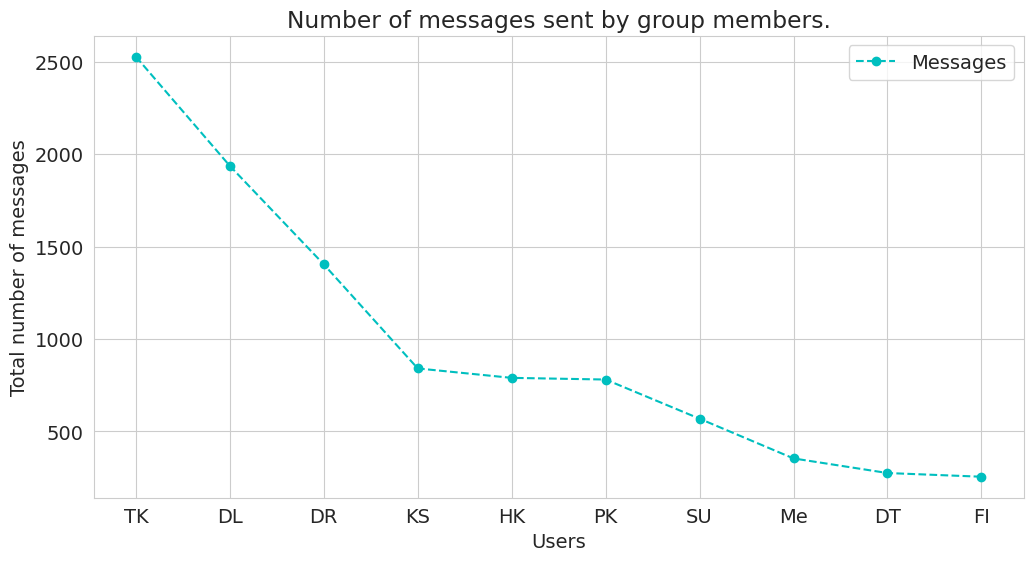

In [20]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(12, 6))


# plt.plot(top10df.initials, top10df.message, marker='o', ls='--', c='cyan')

# BETTER IMPLEMENTATION using the `fmt` argument;
plt.plot(top10df.initials, top10df.message, 'o--c')


# Labels and Title
plt.xlabel('Users')
plt.ylabel('Total number of messages')

plt.title("Number of messages sent by group members.")
plt.legend(['Messages']);

# Saving the plots
# plt.savefig('msg_plots.svg', format = 'svg')

#### *Plotting a bar chart and line graph together.*

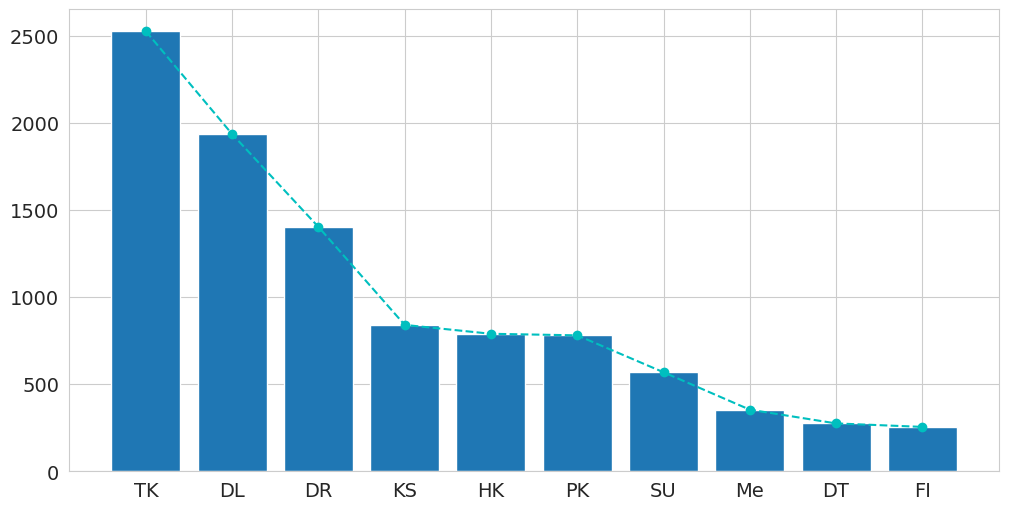

In [21]:
# Improving Default Styles using Seaborn
sns.set_style("whitegrid")

# Increasing the figure size
plt.figure(figsize=(12, 6))

plt.bar(top10df.initials, top10df.message)   # basic bar chart
plt.plot(top10df.initials, top10df.message, 'o--c');   # line chart

### *Beautifying Default Styles using Seaborn*

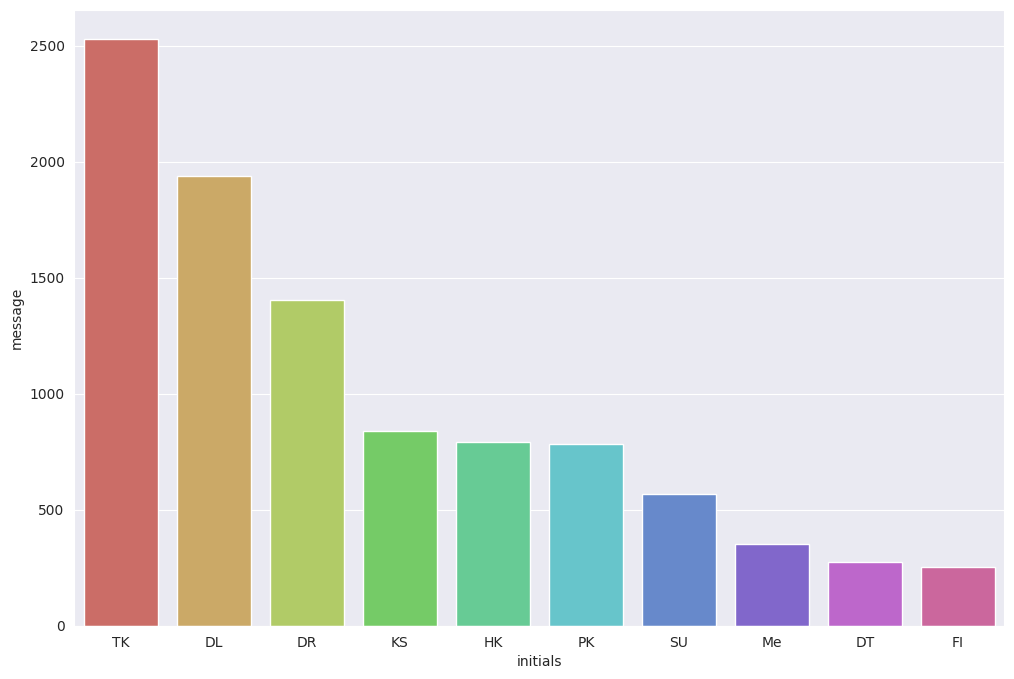

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Improving default styles using Seaborn
sns.set_style("darkgrid")

# For better readability
import matplotlib
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (12, 8)

# Create a bar plot for top 10 initials and message count
sns.barplot(x='initials', y='message', data=top10df, palette="hls")

# Show the plot
plt.show()


# *Important Note*

- Since almost all the plots will be ***comparing* one person with another**, I’ll assign a **specific colour to each person** so that it becomes **easy to identify** each person among *multiple plots*.

- I could've used *seaborn's color palette* but:
    - Seaborn assigns default colors itself, but i wanted the color of a **certain person remains the same, no matter the plot**;
    - Also, I wanted to try some different colors so I grabbed my **colour palette** from https://coolors.co/

- Next, I made a dictionary where each key is the name and the value for each would be their assigned colour. I create a function which reorders colours given a list of names to match the ordering of the plot. This function takes the ordered names as input and returns a reordered list of colours. This list has to be passed into the `pallete` argument in a seaborn plotting function.

## Defining a function to tackle the problem.

I'm defining the following function to ***maintain consistent colors for each person across all plots***. Since the order will vary depending on the plot, this is passed to the function which will reorder colors in a particular order so that **the color of a certain person remains the same no matter the plot**. This will help maintain **consistency and readability** amongst the many graphs I will be plotting.


In [23]:
def get_colors_of_certain_order(names_in_certain_order):
    '''the color of a certain person remains the same, no matter the plot'''

    order = list(names_in_certain_order)
    return_list = []

    for name in order:
        return_list.append(color_dict[name])

    return return_list

### Now, we have a really nice set of colours for each person, with which we can visualize using `sns.palplot`.

{'TK': '#F94144',
 'DL': '#F3722C',
 'DR': '#F8961E',
 'KS': '#FDC500',
 'HK': '#F9C74F',
 'PK': '#90BE6D',
 'SU': '#43AA8B',
 'Me': '#577590',
 'DT': '#6D597A',
 'FI': '#003F88'}

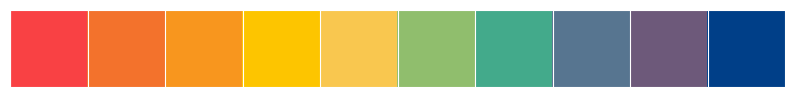

In [24]:
colors = ['#F94144', '#F3722C', '#F8961E', '#FDC500', '#F9C74F', '#90BE6D', '#43AA8B', '#577590', '#6D597A','#003F88']
sns.palplot(colors)    # visualizing the colors' list

names = top10df.initials

color_dict = {}
for name, color in zip(names, colors):
    color_dict[name] = color
color_dict

## Now, finding the *average message length* of the 10 most active users of the group.

In [25]:
import pandas as pd
import re

# Assuming df is the parsed DataFrame from previous steps
df['message_length'] = df['message'].apply(len)

# Create a DataFrame for average message length per user
avg_msg_lengths = df.groupby('user')['message_length'].mean().reset_index().sort_values(by='message_length', ascending=False)

# Display the average message lengths
print(avg_msg_lengths.head(10))

# Example top 10 active users DataFrame for demonstration
top10_users = df['user'].value_counts().head(10).index.tolist()
top10df = df[df['user'].isin(top10_users)]

# Create a column for average message length in top10df
top10df = top10df.groupby('user').agg({
    'message': 'count',
    'message_length': 'mean'
}).reset_index()

# Sort the DataFrame by average message length
top10df_msg = top10df.sort_values(by='message_length', ascending=False)

print(top10df_msg)


                               user  message_length
75                  +91 93598 18687      367.500000
34                  +91 81696 11905      245.000000
76                  +91 94044 50783      232.800000
6                   +91 72762 35231      197.000000
1                   +91 70218 25025      144.166667
148  Shubham Chettiar (TSEC CS, TE)      124.068966
40                  +91 83292 66084      115.400000
0                   +91 70208 31915      106.000000
17                  +91 77158 99478      105.636364
23                  +91 77568 95072      101.000000
                          user  message  message_length
8               Tushar Nankani      354       57.920904
9           group_notification      276       50.539855
4     Kartik Soneji (TSEC, CS)      841       47.328181
0              +91 82916 21138      275       46.320000
5       Pratik K (TSEC CS, SE)      781       34.741357
3  Harsh Kapadia (TSEC IT, SE)      790       33.134177
6   Saurav Upoor (TSEC CS, SE)      

## Now, we will be plotting *most sent messages* and respective *average message lengths* simultaneously, to see some interesting results.
- Plotting multiple charts in a grid
    - Matplotlib and Seaborn also support plotting multiple charts in a grid, using `plt.subplots`, which returns a set of axes that can be used for plotting.

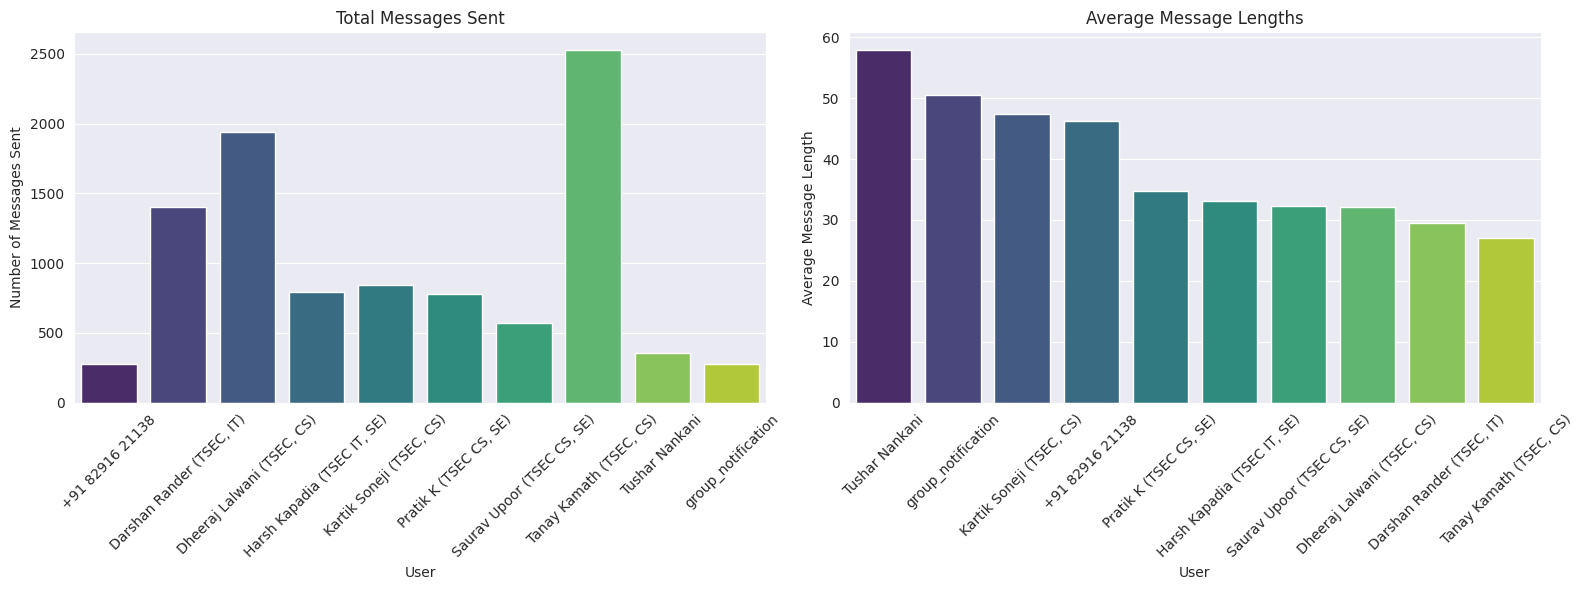

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data based on the previous steps
top10_users = df['user'].value_counts().head(10).index.tolist()
top10df = df[df['user'].isin(top10_users)]
top10df = top10df.groupby('user').agg({
    'message': 'count',
    'message_length': 'mean'
}).reset_index().rename(columns={'message': 'total_messages', 'message_length': 'avg_message_length'})

# Plotting multiple charts in a grid
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_style("darkgrid")

# Define a palette
palette = sns.color_palette("viridis", len(top10df))

# Plot 1 - Countplot of total messages sent
sns.barplot(x='user', y='total_messages', data=top10df, ax=axes[0], palette=palette)

axes[0].set_title('Total Messages Sent')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Number of Messages Sent')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2 - Barplot of those top 10 users' average message lengths
sns.barplot(x='user', y='avg_message_length', data=top10df.sort_values(by='avg_message_length', ascending=False), ax=axes[1], palette=palette)

axes[1].set_title('Average Message Lengths')
axes[1].set_xlabel('User')
axes[1].set_ylabel('Average Message Length')
axes[1].tick_params(axis='x', rotation=45)

# Saving the plots
plt.tight_layout()
plt.savefig('top10_msg_plots_diff.svg', format='svg')

# Display the plots
plt.show()


### It’s really interesting to see plots like this *side by side*, because here comes the twist:

- Ironically, **TK**, the person who sent the **most amount of texts** (2000+), has ***least*** messages' length on *average*. This means this person sends broken and many WhatsApp messages in one go.

- We can see that, **I** send less number of messages while having a **relatively longer message length**, followed by **KS**.

- Here's a **snippet** of how TK sends messages:

<img src="https://imgur.com/xznZczG.png">

#### "*Things aren't always the way they seem like.*"

# 4. Top 10 users most sent media

- The exported chats were exported without any media files. Any message that contained media was indicated with `‘<Media Omitted> ’`.

### *Pre-processing*
**We can use this to filter out and see who sends the most media.**

In [27]:
# Using `groupby`, `count` and `sort_values` attributes.
top10media = df[df.message == '<Media omitted> '].groupby('user').count().sort_values(by="message", ascending = False).head(10)

# Dropping unused column;
top10media.drop(columns=['date_time', 'day', 'month', 'year', 'date'], inplace=True)

# Renaming column name for visualization;
top10media.rename(columns={"message": "media_sent"}, inplace=True)

# resetting index;
top10media.reset_index(inplace=True)

top10media['initials'] = ''
for i in range(10):
    top10media.initials[i] = top10media.user[i].split()[0][0] + top10media.user[i].split()[1][0]

top10media.initials[2] = "Me"    # That's me
top10media.initials[9] = "VR"

### *Visualization using different Seaborn's Color Palettes*
- [Seaborn References](http://seaborn.pydata.org/tutorial/color_palettes.html#using-circular-color-systems)
- [Seaborn's Different Colors](https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08)
- [Seaborn's Color Visualization](https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/)

###### QUICK HACK
- to get **all possible Seaborn's color palettes**:
    - Just put a random input `palette="xyz"`
    - It will then show an error, showing all possible palettes you can try out from!

### Which user sends the most media?

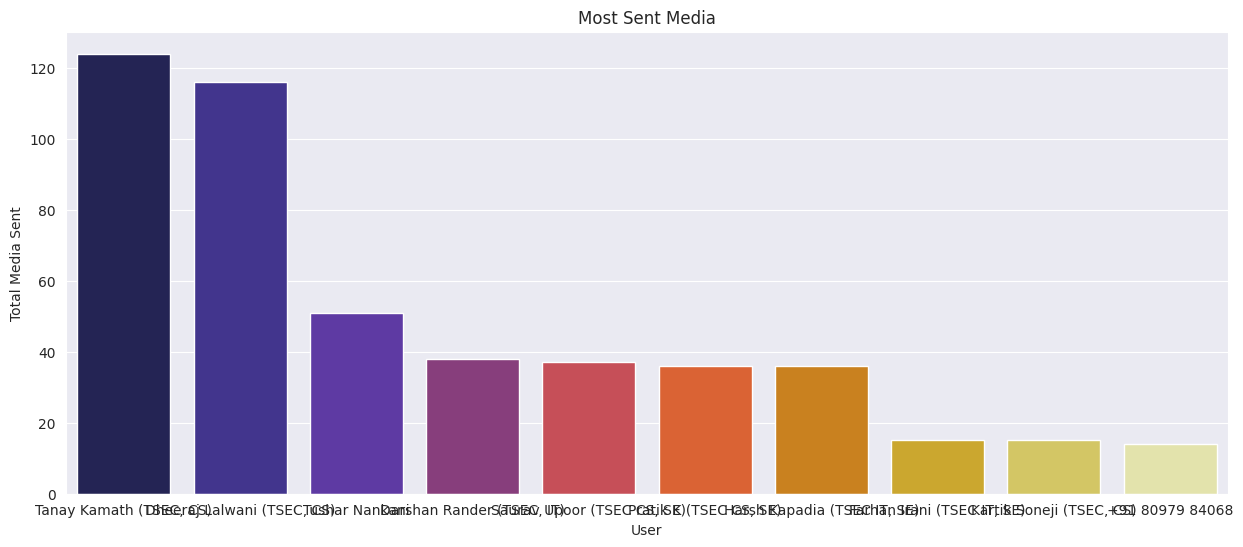

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for demonstration, you need to have this DataFrame already prepared
# Ensure that `top10media` DataFrame has columns `user` and `media_sent`
# For this example, we'll assume `top10media` DataFrame exists and is properly formatted

# Increasing the figure size
plt.figure(figsize=(15, 6))

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting a bar graph
sns.barplot(x='user', y='media_sent', data=top10media, palette="CMRmap")

plt.title('Most Sent Media')
plt.xlabel('User')
plt.ylabel('Total Media Sent')

# Saving the plots
plt.savefig('top10media.svg', format='svg')

# Display the plot
plt.show()


### **TK** is beating everyone by a mile, followed by **DL**. He also ranks the **top** in total messages, *though **last** in average message length*. Most dedicated contributor award goes to **TK**!

# 5. Top 10 most used Emojis
- Will be using the `emoji` module, that was imported earlier.

In [29]:
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.EMOJI_DATA.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in df.iterrows():
    emojis_found = r.findall(row["message"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

#### Will create another helper column using `emoji.demojize("<emoji>")`, since emojis will not rendered.

In [30]:
top10emojis = pd.DataFrame()
# top10emojis = pd.DataFrame(data, columns={"emoji", "emoji_description", "emoji_count"})
top10emojis['emoji'] = [''] * 10
top10emojis['emoji_count'] = [0] * 10
top10emojis['emoji_description'] = [''] * 10

i = 0
for item in emoji_ctr.most_common(10):
    # will be using another helper column, since during visualization, the emojis won't be rendered.
    description = emoji.demojize(item[0])[1:-1]    # using `[1:-1]` to remove the colons ':' at the end of the demojized strin

    # appending top 10 data of emojis.  # Loading into a DataFrame.
    top10emojis.emoji[i] = item[0]
    top10emojis.emoji_count[i] = int(item[1])
    top10emojis.emoji_description[i] = description
    i += 1

top10emojis

emoji  emoji_count              emoji_description
0     😂         1886         face_with_tears_of_joy
1     👍          364                      thumbs_up
2     🏻          247                light_skin_tone
3     🔥          244                           fire
4     😅          220       grinning_face_with_sweat
5     💯          180                 hundred_points
6     🤣          128  rolling_on_the_floor_laughing
7     👏          101                 clapping_hands
8  🤦‍♂️           83                man_facepalming
9     🙏           79                   folded_hands

### Which Emoji is the most used in the chat?

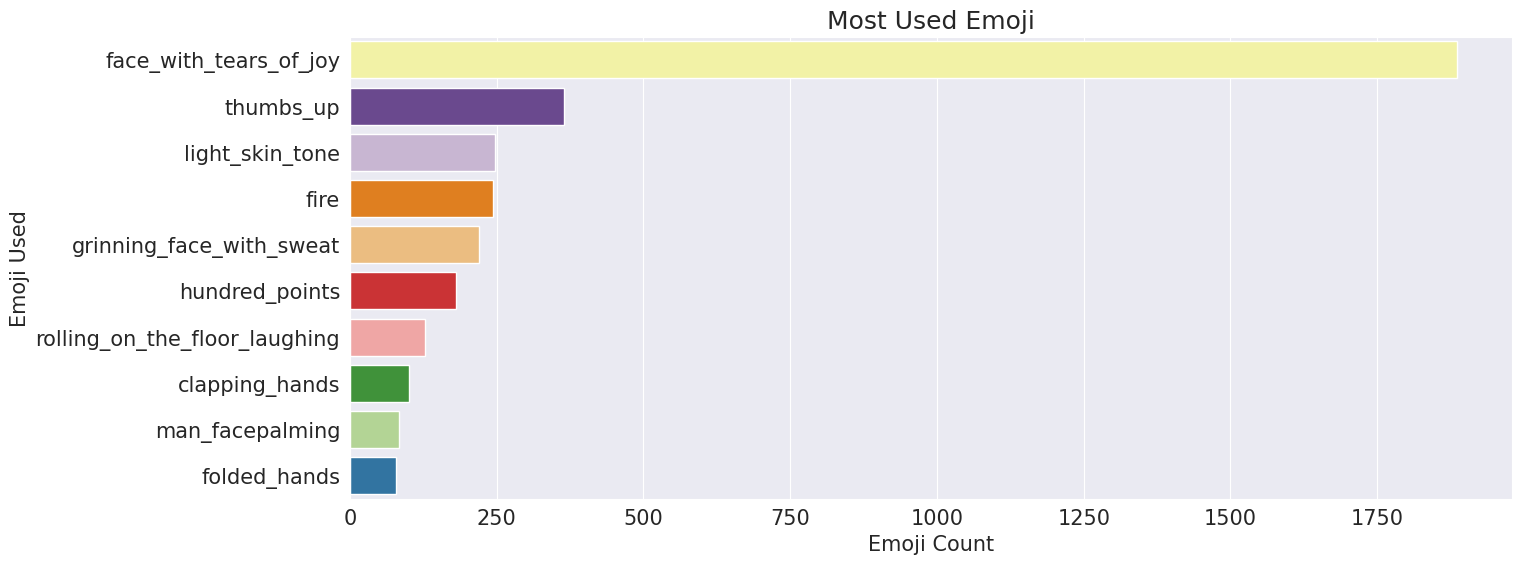

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Sample data for demonstration, you need to have this DataFrame already prepared
# Ensure that `top10emojis` DataFrame has columns `emoji_count` and `emoji_description`
# For this example, we'll assume `top10emojis` DataFrame exists and is properly formatted

# Increasing the figure size
plt.figure(figsize=(15, 6))

# Better Readability
matplotlib.rcParams['font.size'] = 15

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting
sns.barplot(x='emoji_count', y='emoji_description', data=top10emojis, palette="Paired_r")

plt.title('Most Used Emoji')
plt.xlabel('Emoji Count')
plt.ylabel('Emoji Used')

# Saving the plots
plt.savefig('top10emoji.svg', format='svg')

# Display the plot
plt.show()


#### Not that it is worth anything, but "😂" beats everyone by a huge margin!

# 6. Most active days, most active hours, most active months.

### *Pre-processing*

In [32]:
import pandas as pd

# Sample data for demonstration
# Assuming 'df' DataFrame exists and is properly formatted

# Create a copy of the DataFrame
df3 = df.copy()

# Add a helper column to keep a count of messages
df3['message_count'] = 1

# Extract the hour from the 'date_time' column
df3['hour'] = df3['date_time'].apply(lambda x: x.hour)

# Group by hour and count the number of messages in each hour
grouped_by_time = df3.groupby('hour')['message_count'].count().reset_index()

# Rename columns for better readability
grouped_by_time.columns = ['hour', 'message_count']

# Display the result
print(grouped_by_time)


    hour  message_count
0      0            490
1      1            235
2      2            219
3      3            125
4      4             36
5      5             21
6      6              3
7      7             32
8      8             86
9      9            215
10    10            445
11    11            594
12    12            959
13    13            904
14    14           1138
15    15            570
16    16            519
17    17           1109
18    18            727
19    19            764
20    20            849
21    21           1267
22    22           1194
23    23           1154


### Which hour of the day are most messages exchanged?

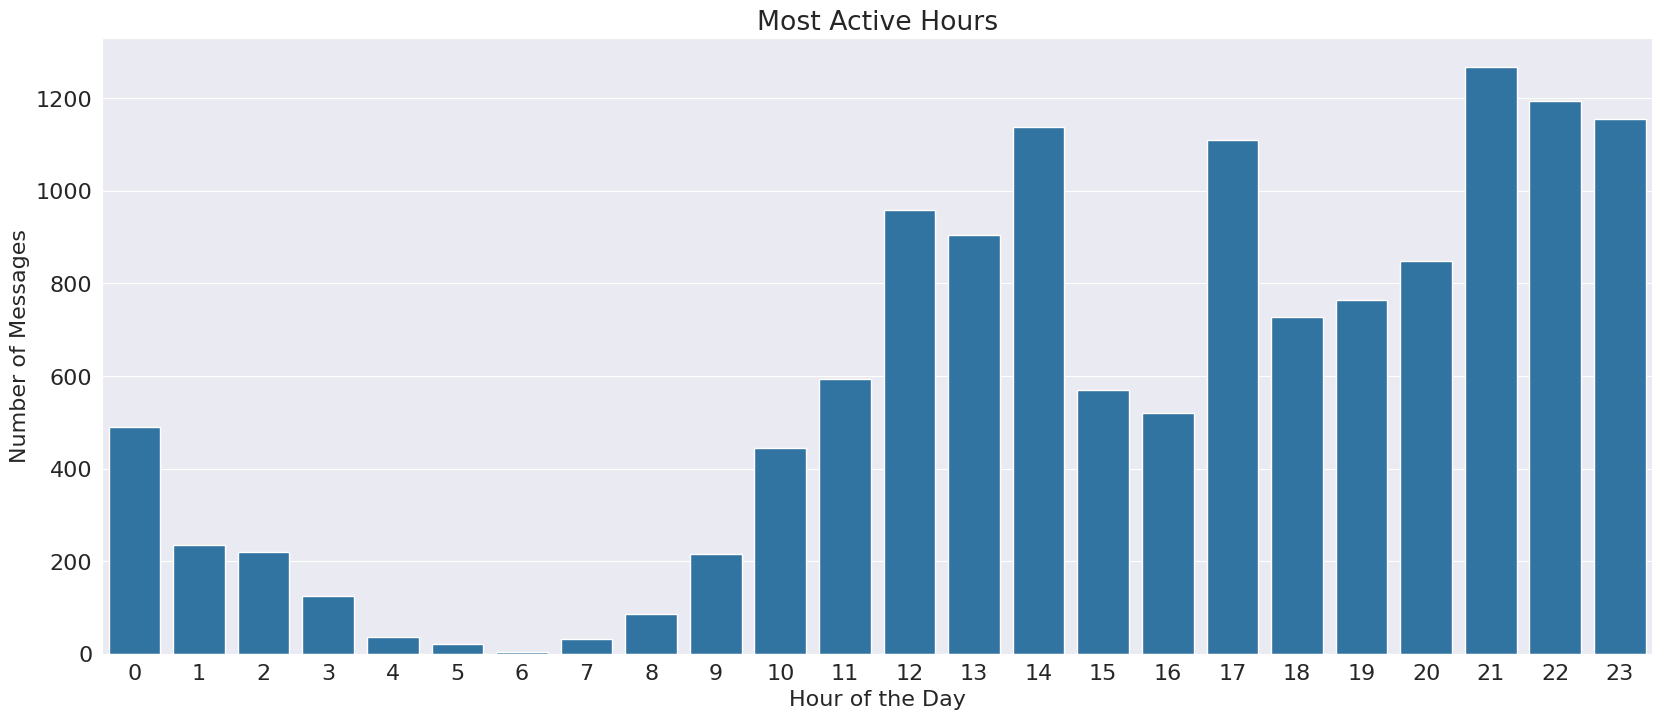

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Better Readability
import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (20, 8)

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# PLOT: grouped by hour
sns.barplot(x='hour', y='message_count', data=grouped_by_time)
plt.title('Most Active Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')

# Saving the plot
plt.savefig('most_active_hours.svg', format='svg')

# Show the plot
plt.show()


#### Intrestingly, the group is *most active around midnight*, followed by *afternoon*.

### *Pre-processing weekdays and months*

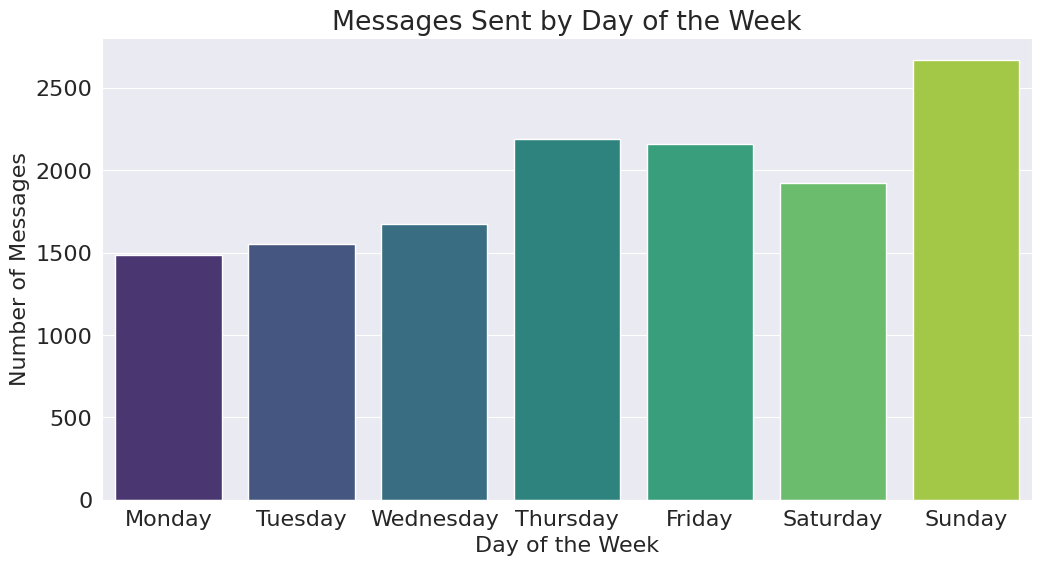

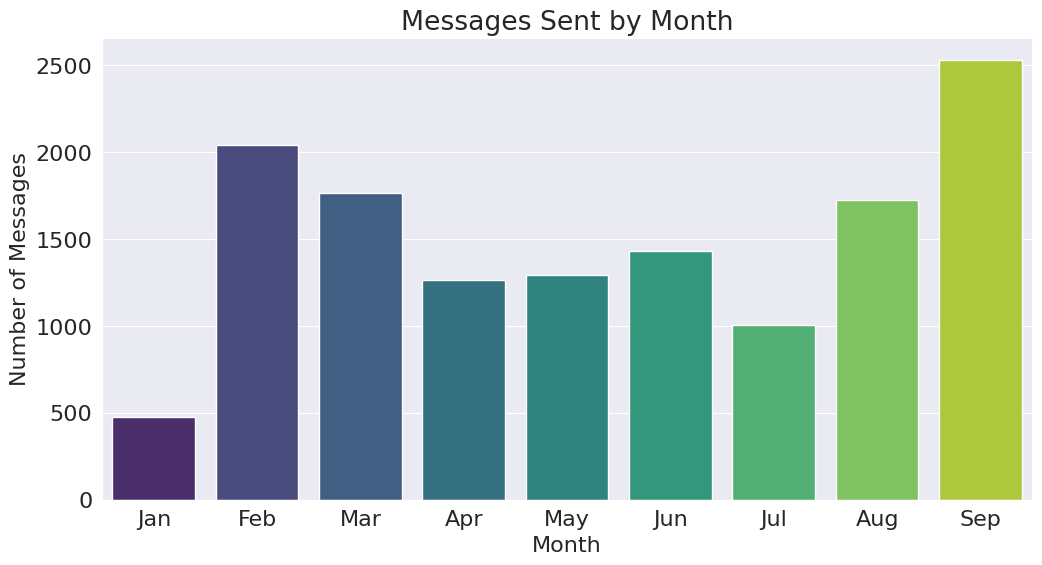

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the DataFrame 'df3' has a 'date_time' column with datetime type
# and contains the necessary columns 'day' and 'month' which we'll create.

# Helper column to keep a count of messages
df3['message_count'] = 1

# Extracting the day name and month name from the date_time column
df3['day'] = df3['date_time'].dt.day_name()
df3['month'] = df3['date_time'].dt.strftime('%b')  # %b gives abbreviated month name

# specific `order` to be printed in
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']   # till Sept, since chats are till September

# Grouping by day
grouped_by_day = df3.groupby('day')['message_count'].count().reset_index()
grouped_by_day['day'] = pd.Categorical(grouped_by_day['day'], categories=days, ordered=True)
grouped_by_day = grouped_by_day.sort_values('day')

# Grouping by month
grouped_by_month = df3.groupby('month')['message_count'].count().reset_index()
grouped_by_month['month'] = pd.Categorical(grouped_by_month['month'], categories=months, ordered=True)
grouped_by_month = grouped_by_month.sort_values('month')

# Plotting grouped by day
plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='message_count', data=grouped_by_day, palette='viridis')
plt.title('Messages Sent by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Messages')
plt.savefig('messages_by_day.svg', format='svg')
plt.show()

# Plotting grouped by month
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='message_count', data=grouped_by_month, palette='viridis')
plt.title('Messages Sent by Month')
plt.xlabel('Month')
plt.ylabel('Number of Messages')
plt.savefig('messages_by_month.svg', format='svg')
plt.show()


## *Visualization*
### Now, we will be plotting *grouped by day* and respective *group by month* simultaneously, to see some interesting results.
- Using `plt.subplots` to plot multiple charts in a grid.

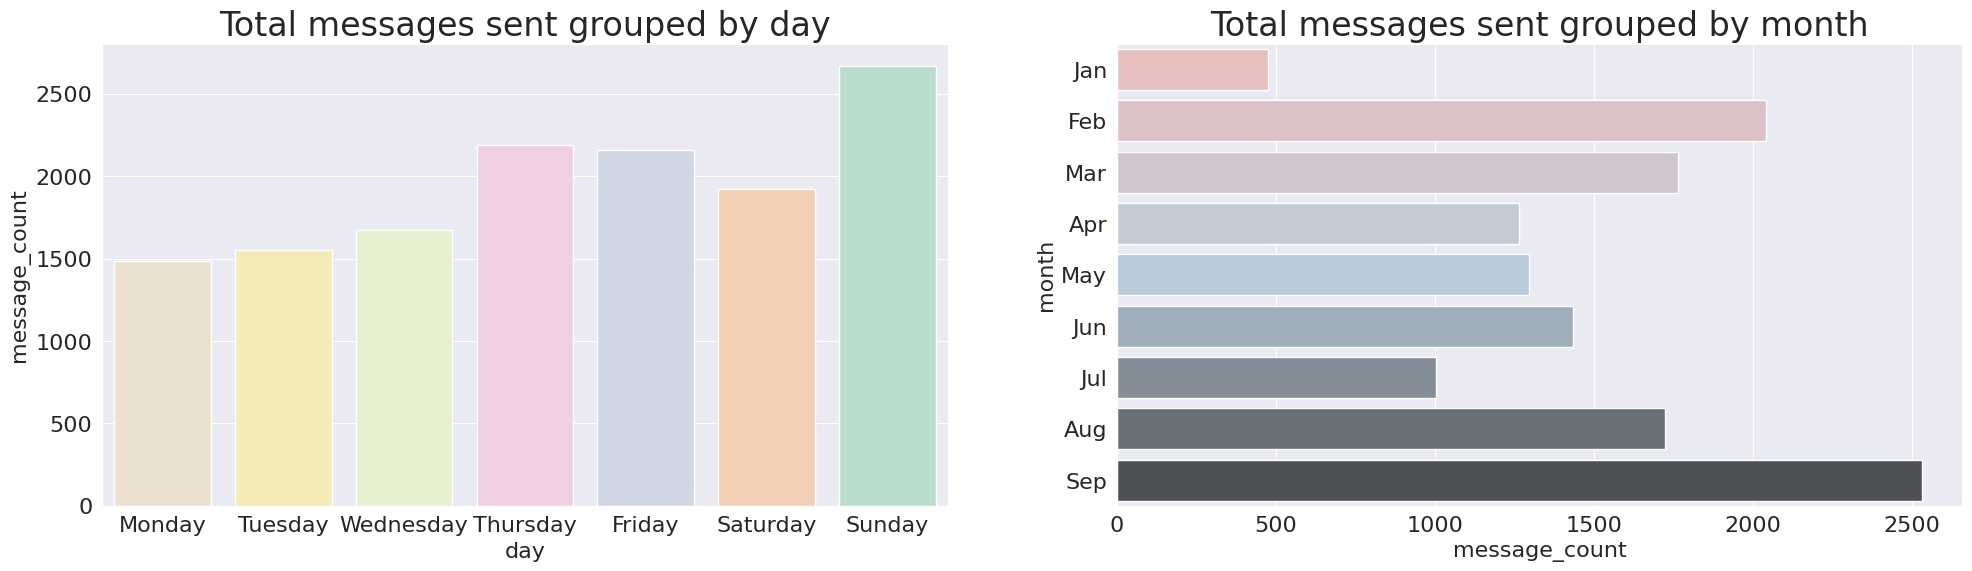

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the DataFrame 'df3' has a 'date_time' column with datetime type
# and contains the necessary columns 'day' and 'month' which we'll create.

# Helper column to keep a count of messages
df3['message_count'] = 1

# Extracting the day name and month name from the date_time column
df3['day'] = df3['date_time'].dt.day_name()
df3['month'] = df3['date_time'].dt.strftime('%b')  # %b gives abbreviated month name

# specific `order` to be printed in
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']   # till Sept, since chats are till September

# Grouping by day
grouped_by_day = df3.groupby('day')['message_count'].count().reset_index()
grouped_by_day['day'] = pd.Categorical(grouped_by_day['day'], categories=days, ordered=True)
grouped_by_day = grouped_by_day.sort_values('day')

# Grouping by month
grouped_by_month = df3.groupby('month')['message_count'].count().reset_index()
grouped_by_month['month'] = pd.Categorical(grouped_by_month['month'], categories=months, ordered=True)
grouped_by_month = grouped_by_month.sort_values('month')

fig, axs = plt.subplots(1, 2, figsize=(24, 6))

# Better Readability
import matplotlib
matplotlib.rcParams['font.size'] = 20

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# Plotting;

# PLOT 1: Messages grouped by weekday
sns.barplot(x='day', y='message_count', data=grouped_by_day, ax=axs[0], palette='Pastel2_r')
axs[0].set_title('Total messages sent grouped by day')

# PLOT 2: Messages grouped by months
sns.barplot(x='message_count', y='month', data=grouped_by_month, ax=axs[1], palette='Pastel1_d')
axs[1].set_title('Total messages sent grouped by month')

# Saving the plots;
plt.savefig('days_and_month.svg', format='svg')
plt.show()


##### The group is most active on Sundays, and least active on Mondays (probably *Monday Blues*)
##### It has been recently very active, in September.

### Now, we will plot a *heatmap*, combining the above to bar plots, for a better understanding!

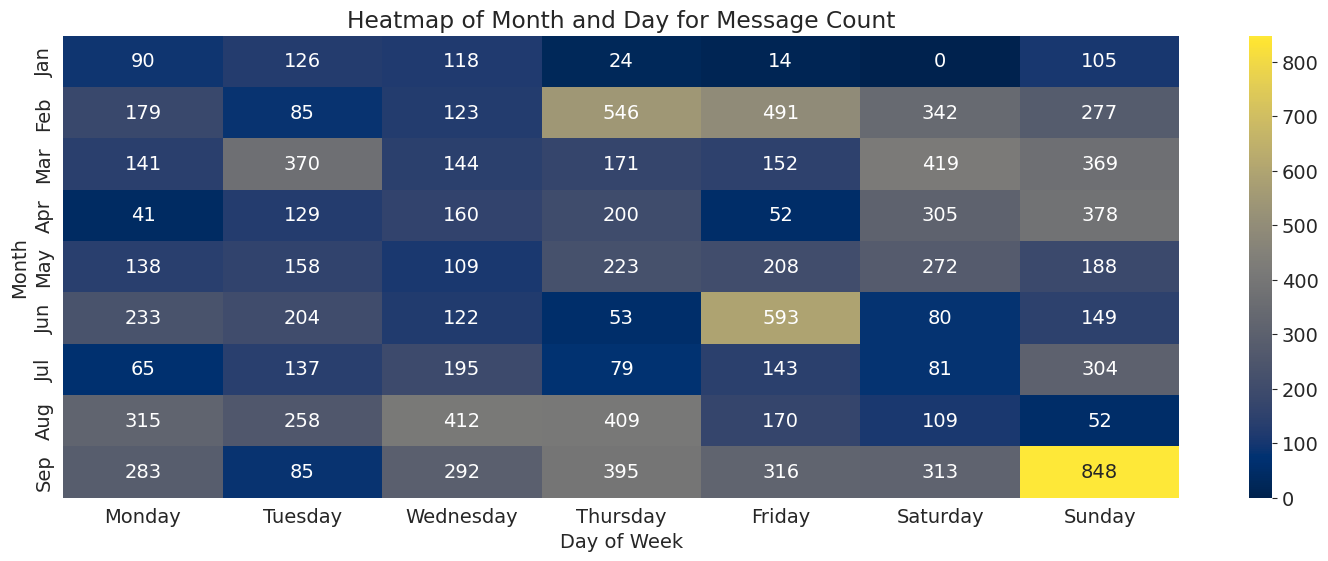

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the DataFrame 'df3' has a 'date_time' column with datetime type
# and contains the necessary columns 'day' and 'month' which we'll create.

# Helper column to keep a count of messages
df3['message_count'] = 1

# Extracting the day name and month name from the date_time column
df3['day'] = df3['date_time'].dt.day_name()
df3['month'] = df3['date_time'].dt.strftime('%b')  # %b gives abbreviated month name

# specific `order` to be printed in
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']   # till Sept, since chats are till September

# Grouping by month and day
grouped_by_month_and_day = df3.groupby(['month', 'day']).count().reset_index()[['month', 'day', 'message_count']]

# Creating a pivot table and filling missing values with zeros
pt = grouped_by_month_and_day.pivot_table(index='month', columns='day', values='message_count', aggfunc='sum', fill_value=0).reindex(index=months, columns=days)

# Better Readability
import matplotlib
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 6)

# Beautifying Default Styles using Seaborn
sns.set_style("darkgrid")

# PLOT: heatmap
sns.heatmap(pt, cmap='cividis', annot=True, fmt="d")
plt.title('Heatmap of Month and Day for Message Count')
plt.xlabel('Day of Week')
plt.ylabel('Month')

# Saving the plots
plt.savefig('month_day_heatmap.svg', format='svg')
plt.show()


# *Inferences*
- The group is more active on weekends, throughout the months.
- September has the most lighter blue shades and more yellow gradients.
- This gives a combined analysis, which is really helpful in real-time projects.

# Most used words in the chat.
### Finally, I will be ending with *the most used words*, using `WordCloud` module in Python.

In [37]:
comment_words = ' '

# stopwords --> Words to be avoided while forming the WordCloud,
# removed group_notifications like 'joined', 'deleted';
# removed really common words like "yeah" and "okay".
stopwords = STOPWORDS.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])


# iterate through the DataFrame.
for val in df3.message.values:

    # typecaste each val to string.
    val = str(val)

    # split the value.
    tokens = val.split()

    # Converts each token into lowercase.
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    for words in tokens:
        comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 8).generate(comment_words)

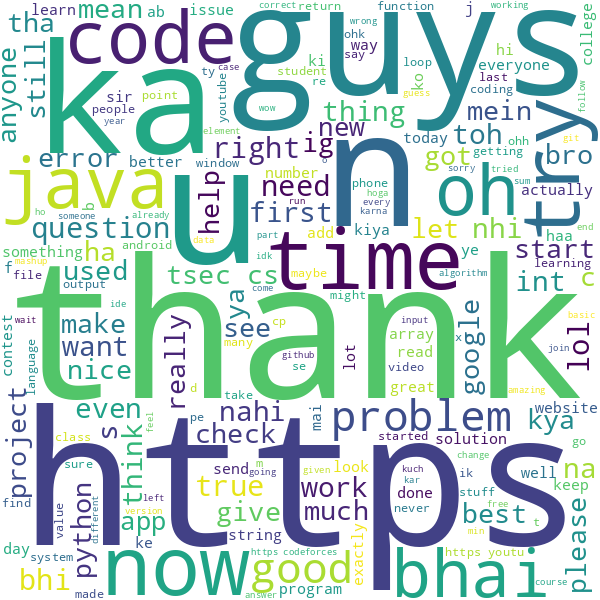

In [38]:
wordcloud.to_image()

In [39]:
from stylecloud import gen_stylecloud
from wordcloud import STOPWORDS

# Initialize an empty string to store all words
comment_words = ''

# Define stopwords to be avoided while forming the word cloud
stopwords = set(STOPWORDS)
stopwords.update(['group', 'link', 'invite', 'joined', 'message', 'deleted', 'yeah', 'hai', 'yes', 'okay', 'ok', 'will', 'use', 'using', 'one', 'know', 'guy', 'group', 'media', 'omitted'])

# Iterate through the DataFrame to extract words from messages
for val in df3.message.values:
    # Typecast each message value to string
    val = str(val)
    # Split the value into tokens
    tokens = val.split()
    # Convert each token into lowercase and append to the comment_words string
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens) + " "

# Generate the word cloud using stylecloud
gen_stylecloud(text=comment_words,
               icon_name='fas fa-comment',  # Choose an icon for the word cloud
               palette='colorbrewer.qualitative.Set2_8',  # Choose a color palette
               background_color='white',  # Set background color
               gradient='horizontal',  # Set gradient direction
               output_name='styled_wordcloud.png'  # Set output file name
               )


#Sentiment analysis
*Sentiment labels*
To perform sentiment analysis on the messages in the provided data, we can use the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool, which is available in the NLTK (Natural Language Toolkit) library. Here's how you can do it:

In [40]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for each message
def get_sentiment_score(message):
    # Calculate the sentiment scores for the message
    scores = sid.polarity_scores(message)
    # Return the compound sentiment score
    return scores['compound']

# Apply the sentiment analysis function to each message in the DataFrame
df3['sentiment_score'] = df3['message'].apply(get_sentiment_score)

# Classify messages as positive, negative, or neutral based on the sentiment score
df3['sentiment'] = df3['sentiment_score'].apply(lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral'))

# Display the DataFrame with sentiment scores and classifications
print(df3[['message', 'sentiment_score', 'sentiment']])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                 message  sentiment_score  \
0      Messages and calls are end-to-end encrypted. N...          -0.2960   
1      Tanay Kamath (TSEC, CS) created group "CODERS👨...           0.2500   
2             You joined using this group's invite link            0.1531   
3      +91 99871 38558 joined using this group's invi...           0.1531   
4      +91 91680 38866 joined using this group's invi...           0.1531   
...                                                  ...              ...   
13650                                    MCQs mark kiya            0.0000   
13651                                    Sign-in kiya😂😅            0.0000   
13652                                  Incognito se na?            0.0000   
13653                                               Yup            0.0000   
13654  guys, please do me a favor and vote in this po...           0.8750   

      sentiment  
0      negative  
1      positive  
2      positive  
3  

Sentiment Distribution

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


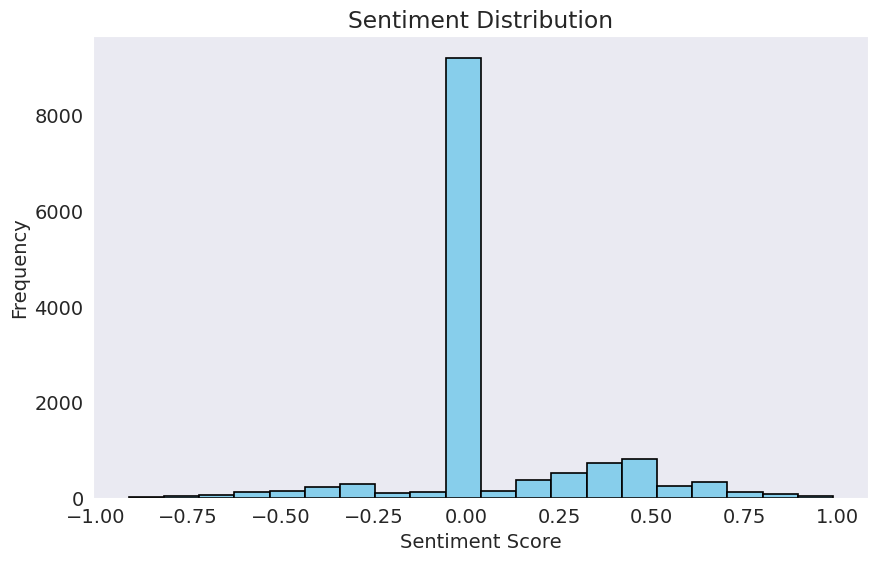

In [41]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download necessary NLTK data (if not already downloaded)
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get the compound sentiment score for each message
def get_sentiment_score(message):
    # Compute sentiment scores
    scores = sid.polarity_scores(message)
    # Return the compound score
    return scores['compound']

# Apply the function to compute sentiment scores for each message
df3['sentiment_score'] = df3['message'].apply(get_sentiment_score)

# Plot the distribution of sentiment scores
plt.figure(figsize=(10, 6))
df3['sentiment_score'].hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


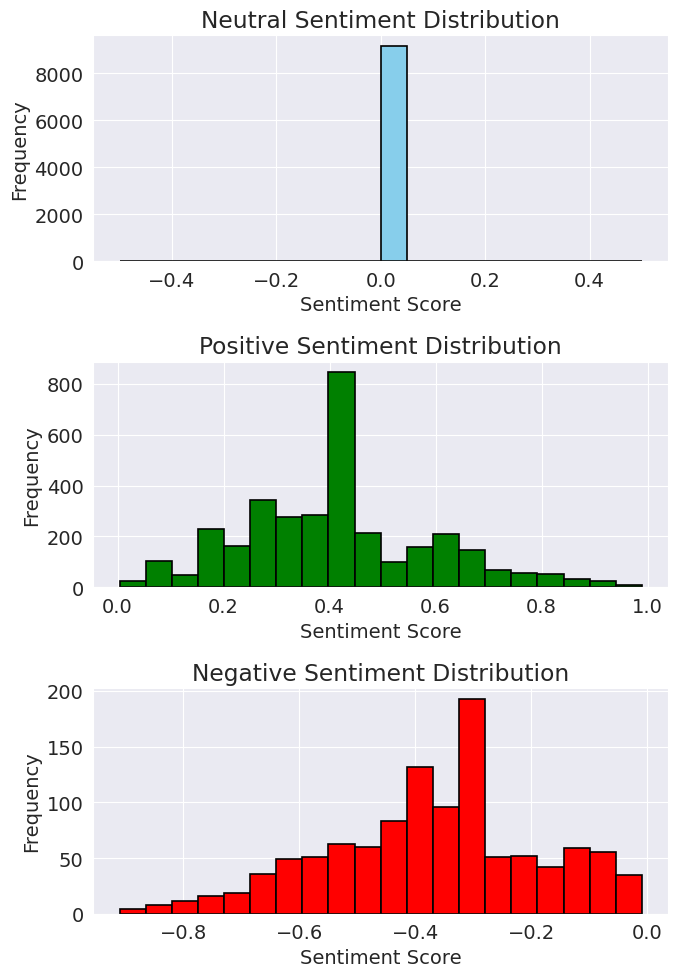

In [42]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(7, 10))

# Plot distribution of neutral scores
axs[0].hist(df3[df3['sentiment_score'] == 0]['sentiment_score'], bins=20, color='skyblue', edgecolor='black', linewidth=1.2)
axs[0].set_title('Neutral Sentiment Distribution')
axs[0].set_xlabel('Sentiment Score')
axs[0].set_ylabel('Frequency')

# Plot distribution of positive scores
axs[1].hist(df3[df3['sentiment_score'] > 0]['sentiment_score'], bins=20, color='green', edgecolor='black', linewidth=1.2)
axs[1].set_title('Positive Sentiment Distribution')
axs[1].set_xlabel('Sentiment Score')
axs[1].set_ylabel('Frequency')

# Plot distribution of negative scores
axs[2].hist(df3[df3['sentiment_score'] < 0]['sentiment_score'], bins=20, color='red', edgecolor='black', linewidth=1.2)
axs[2].set_title('Negative Sentiment Distribution')
axs[2].set_xlabel('Sentiment Score')
axs[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


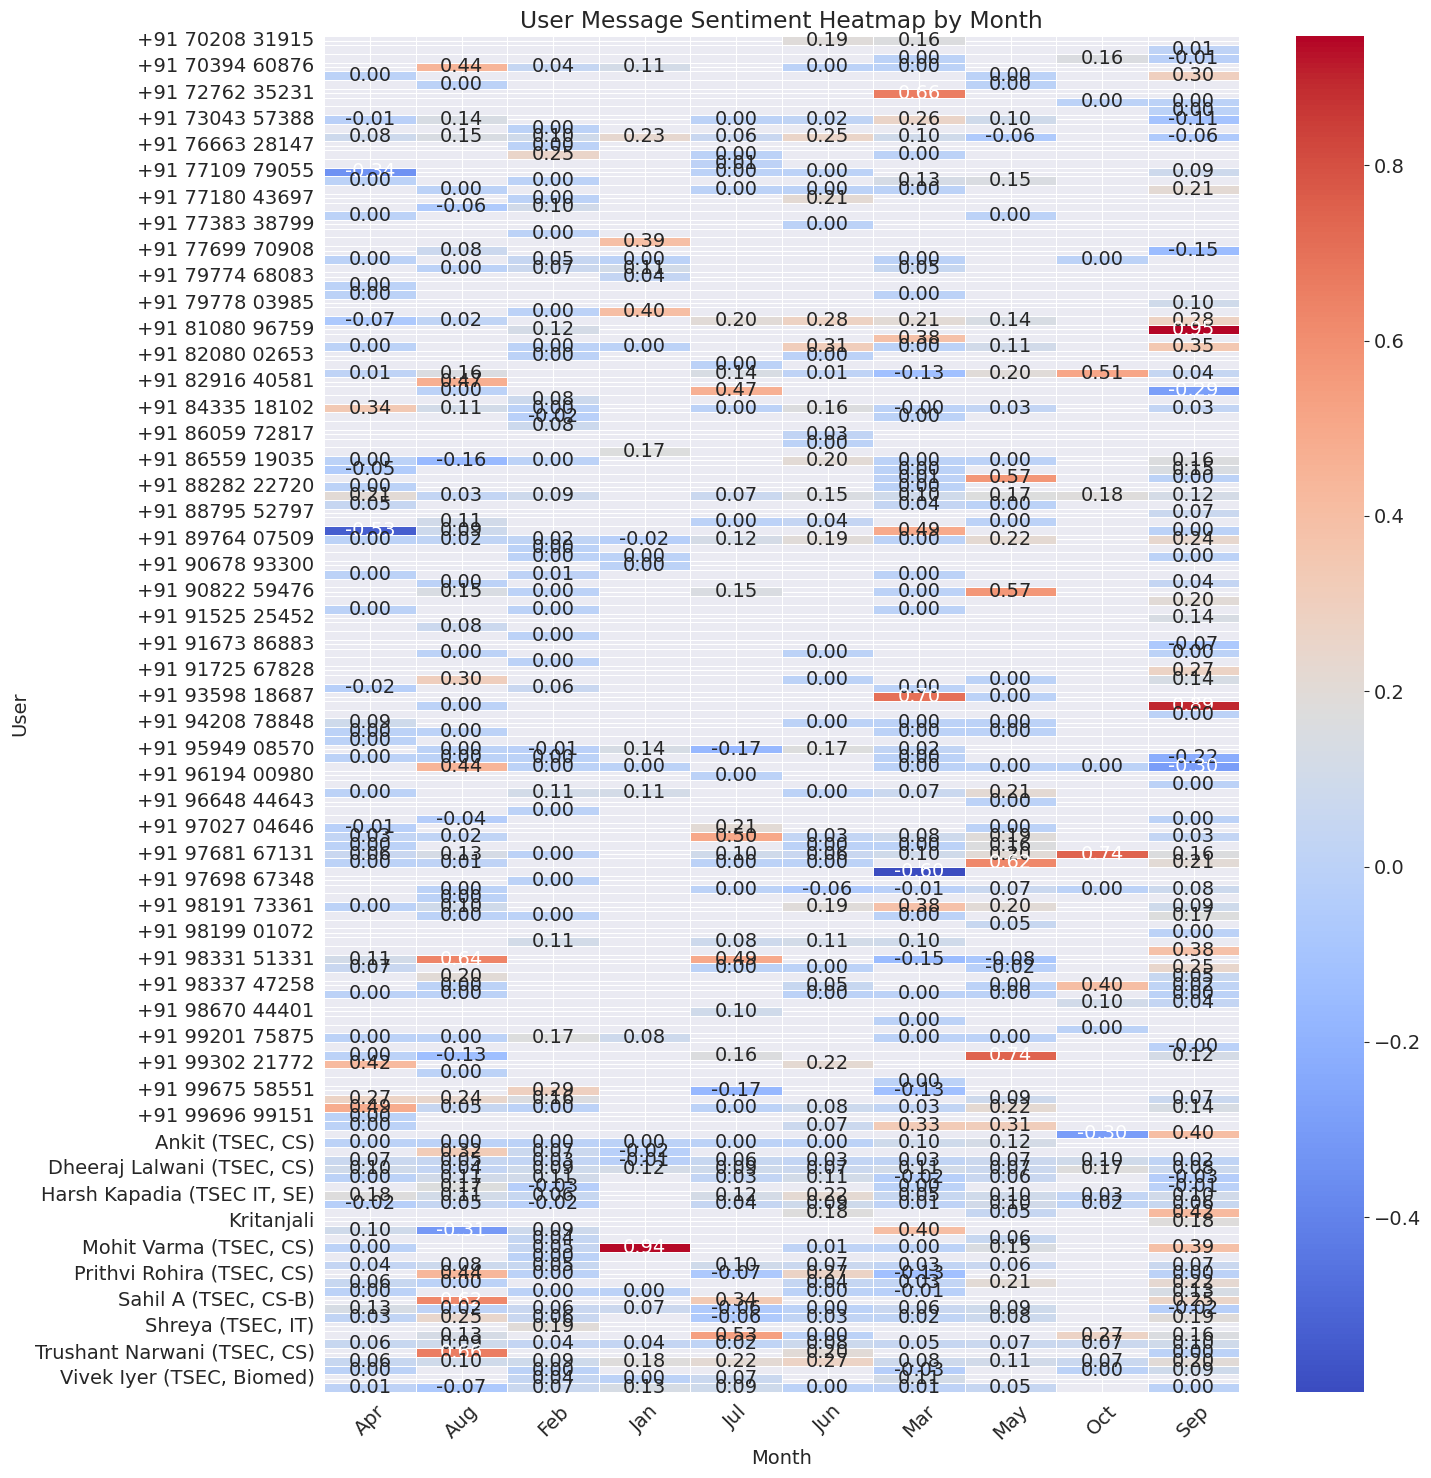

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot table to get sentiment scores for each user and month
sentiment_pivot = df3.pivot_table(index='user', columns='month', values='sentiment_score', aggfunc='mean')

# Create heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(sentiment_pivot, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('User Message Sentiment Heatmap by Month')
plt.xlabel('Month')
plt.ylabel('User')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Ensure y-axis labels are horizontal
plt.tight_layout()
plt.show()


Topic Modelling

In [44]:
!pip install bertopic umap hdbscan

from bertopic import BERTopic
from umap import UMAP
from collections import Counter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54

In [45]:
topic_model = BERTopic(language="english", calculate_probabilities=True)
topics, _ = topic_model.fit_transform(df3['message'])


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [46]:
topic_model.get_topic_info()

Topic  Count                                               Name  \
0       -1   3296                                   -1_and_to_it_the   
1        0   1184                                    0_ikr_ohk_ik_ty   
2        1    689                     1_omitted_media_audio_removing   
3        2    541                            2_sparsh_ads_been_there   
4        3    323                         3_deleted_message_was_this   
..     ...    ...                                                ...   
231    230     11                     230_backend_front_end_frontend   
232    231     11                          231_pow_power_function_pt   
233    232     11                          232_know_lucked_ahh_buddy   
234    233     10  233_animations_animation_energy_httpsgithubcom...   
235    234     10                       234_videos_video_isle_mkbhds   

                                        Representation  \
0          [and, to, it, the, is, of, in, my, but, on]   
1    [ikr, ohk, ik, ty, mastt, yess, wtf, ouch, kha...   
2    [omitted, media, audio, removing, longer, reco...   
3               [sparsh, ads, been, there, , , , , , ]   
4    [deleted, message, was, this, waiting, message...   
..                                                 ...   
231  [backend, front, end, frontend, functionality,...   
232  [pow, power, function, pt, tomorrows, upper, b...   
233  [know, lucked, ahh, buddy, hmm, yup, already, ...   
234  [animations, animation, energy, httpsgithubcom...   
235  [videos, video, isle, mkbhds, tai, grandma, lo...   

                                   Representative_Docs  
0    [⚡ *Weekly challenges* are going to start from...  
1                                [Ohk👍 , ikr😂 , Ikr😭 ]  
2    [<Media omitted> , <Media omitted> , <Media om...  
3                        [been there , ads? , Sparsh ]  
4    [This message was deleted , This message was d...  
..                                                 ...  
231  [Why front end? , That's just the backend budd...  
232  [We had pow , For pow function , In case of po...  
233                  [I know that. , I know , I know ]  
234  [Great animations! What all did you use? , The...  
235  [These are few important videos by Rachit jain...  

[236 rows x 5 columns]

Plot bar chart for the topics

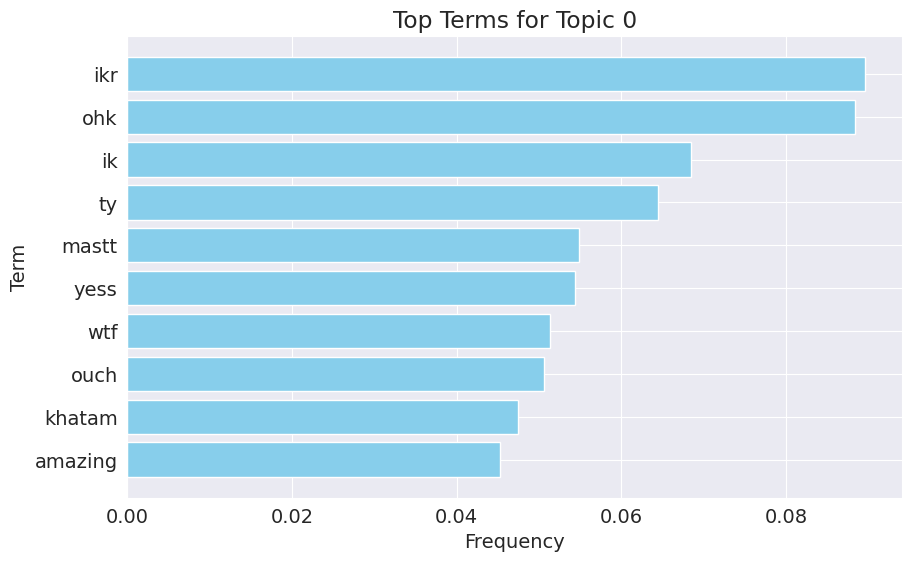

In [47]:
# Create bar chart
import matplotlib.pyplot as plt

# Extract topic terms and their frequencies
topic_terms = topic_model.get_topics()
selected_topic = 0  # Change this to the index of the topic you want to plot

# Check if the selected topic exists
if selected_topic in topic_terms:
    terms, frequencies = zip(*topic_terms[selected_topic])  # Unpack the tuples
    top_terms = terms[:10]  # Select top terms
    top_frequencies = frequencies[:10]  # Select corresponding frequencies

    # Create bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_terms, top_frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Term')
    plt.title('Top Terms for Topic {}'.format(selected_topic))
    plt.gca().invert_yaxis()  # Invert y-axis to display top terms at the top
    plt.show()
else:
    print("Selected topic does not exist.")


**Term score decline:**
To visualize the decline in term scores across topics, you can plot the scores of a particular term across different topics. Here's how you can do it:

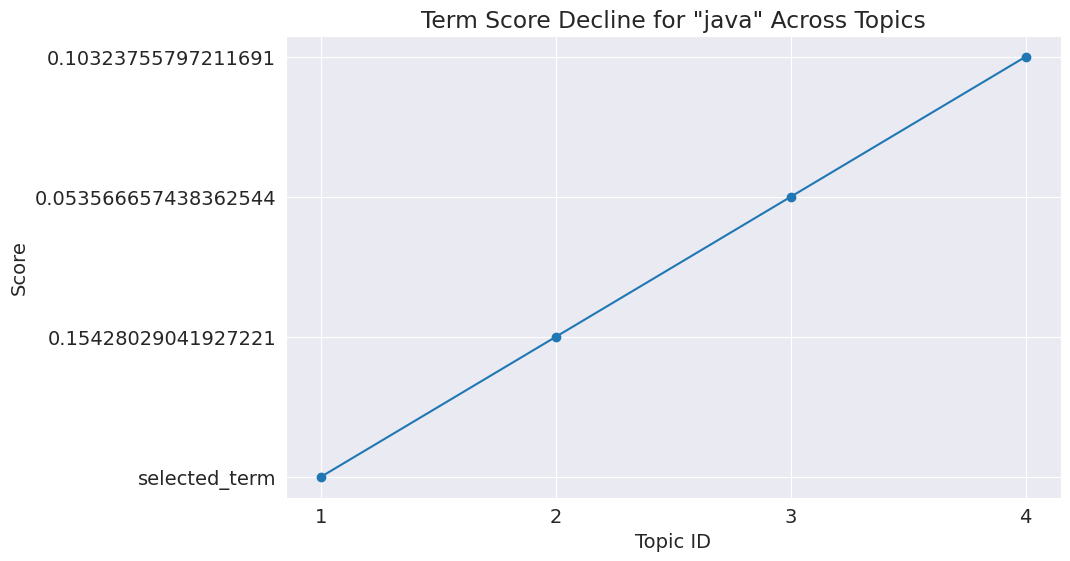

In [48]:
import matplotlib.pyplot as plt

# Specify the term for which you want to visualize the score decline
selected_term = "java"

# Get the scores of the selected term across all topics
term_scores = ['selected_term']

for topic_id, terms in topic_terms.items():
    for term, score in terms:
        if term == selected_term:
            term_scores.append(score)

# Plot the decline in scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(term_scores) + 1), term_scores, marker='o', linestyle='-')
plt.xlabel('Topic ID')
plt.ylabel('Score')
plt.title('Term Score Decline for "{}" Across Topics'.format(selected_term))
plt.xticks(range(1, len(term_scores) + 1))
plt.grid(True)
plt.show()


In [49]:
import pandas as pd

# Example DataFrame structure as a dictionary
data = {
    'time_interval': ['Jan-2024', 'Jan-2024', 'Feb-2024', 'Feb-2024'],
    'topic': [0, 1, 0, 1],
    'message_count': [10, 20, 15, 25]
}

# Create DataFrame
topic_time_df = pd.DataFrame(data)

# Pivot the DataFrame to create a matrix for the heatmap
heatmap_data = topic_time_df.pivot(index="topic", columns="time_interval", values="message_count")

# Display the DataFrame
print(heatmap_data)


time_interval  Feb-2024  Jan-2024
topic                            
0                    15        10
1                    25        20


Topic similarity
1. Intertopic distance map

In [50]:
import pandas as pd
from bertopic import BERTopic

# Assuming you have a DataFrame named 'df' containing your text data
# Preprocess the text data
def preprocess_text(text):
    # Implement your text preprocessing steps here
    # For example, convert text to lowercase, remove punctuation, etc.
    return text

df['clean_msg'] = df['message'].apply(preprocess_text)

# Create the corpus
corpus = df['clean_msg'].tolist()

# Initialize and fit the BERTopic model
model = BERTopic()
topics, _ = topic_model.fit_transform(corpus)

# Now 'topics' contains the topic assignments for each document in your corpus
# You can explore the topics further using methods provided by the BERTopic library



In [51]:
# Visualize topics with a custom number of topics
fig = topic_model.visualize_barchart()
fig


In [52]:
topic_model.visualize_topics()

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

# Initialize and fit the BERTopic model
model = BERTopic()
topics, _ = model.fit_transform(corpus)

# Get topic embeddings
topic_embeddings = model.transform(corpus)

# Calculate cosine similarity between topic embeddings
similarity_matrix = cosine_similarity(topic_embeddings)

# Display the similarity matrix
print(similarity_matrix)




[[1.         0.66394474]
 [0.66394474 1.        ]]


In [54]:
# Visualize the topic hierarchy
topic_model.visualize_hierarchy()


In [55]:
# Choose a random message from your data
random_message = "My soln in Python"

# Transform the random message into its topic probability distribution
topic_probabilities =topic_model.transform([random_message])

# Print the topic probability distribution
print(topic_probabilities)


([-1], array([[2.71275602e-05, 2.59629343e-05, 2.64739227e-05, 2.90165427e-05,
        1.67194190e-04, 6.53865119e-05, 5.32654696e-04, 4.15863343e-05,
        4.92661226e-04, 2.92646755e-05, 3.65321383e-04, 6.05559221e-04,
        9.63546332e-04, 3.58944732e-05, 5.52619557e-04, 5.23199790e-05,
        1.71475898e-04, 7.12000205e-04, 6.10454892e-04, 1.45989324e-02,
        9.00818521e-04, 7.39378057e-04, 3.90732503e-05, 7.75640871e-04,
        3.29794463e-05, 7.61704698e-04, 4.19465951e-04, 6.39941300e-04,
        1.29020022e-04, 3.03199399e-05, 3.20442044e-04, 1.82831874e-04,
        2.84565596e-05, 4.88227734e-04, 4.34567303e-04, 5.57664531e-04,
        5.19215109e-05, 5.08699564e-05, 3.36757019e-05, 4.75431706e-04,
        5.69346175e-05, 5.01217723e-05, 5.70599473e-05, 3.74558134e-05,
        5.61436264e-04, 3.09904960e-05, 5.18269409e-04, 6.20482414e-04,
        8.95556695e-04, 5.27687468e-04, 5.51381062e-05, 9.58567768e-04,
        6.41408490e-04, 3.34725381e-05, 4.62832898e-05, 6

# *Conclusion*

- The insights were really interesting to look at!

- We first loaded the data as a .txt file coverted it using `RawtoDF` function.
- Then  we added helper columns, manipulated datetime entries.
- Then, we started analysing our whatsapp data!

Here is what we looked at!

**1. Overall frequency of total messages on the group.**

**2. Top 10 most active days.**

**3. Top 10 active users on the group (with a twist - Most active user had the least average message length ).**
- Ghosts present in the group. (shocking results - 80+ participants who haven't even sent a single message!)

**4. Top 10 users most sent media.**
- *TK* beats everyone by a mile!

**5. Top 10 most used emojis.**
- using the `emoji` module!

**6. Most active hours and weekdays.**
 - Heatmaps of weekdays and months.
 - Most active hours, weekdays, and months.

**7. Most used words - WordCloud**

### That's it from my end! I hope you *learnt and enjoyed* a lot!

# *Where to go from here?*

- Extending this **Whatsapp Analysis Project**!
  - Adding a **Sentiment Analyser to the texts** - Swear Words & Sentiments!
  - Libraries called `profanity_check`, `TextBlob`
  - VADER (Valence Aware Dictionary and Sentiment Reasoner) from NTLK and TextBlob.
- Instagram Data Analysis
- Play Store Data Analysis
- Exploring more datasets! It is *never-ending*, as there can be ***Infinite Stories with Data***!
- Once, done with enough Data Analysis, try making Datasets, scraping Data from websites and creating Interesting Datasets!

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Ensure required NLTK data packages are downloaded
nltk.download('stopwords')
nltk.download('punkt')

In [ ]:
!pip install vaderSentiment


In [58]:
import pandas as pd
import re
from datetime import datetime

# Function to parse a single line of the chat
def parse_line(line):
    # WhatsApp chat format: [date], [time] - [sender]: [message]
    pattern = r'^(\d{1,2}/\d{1,2}/\d{2,4}),\s(\d{1,2}:\d{2})\s-\s(.+?):\s(.+)$'
    match = re.match(pattern, line)
    if match:
        date, time, sender, message = match.groups()
        datetime_str = f'{date} {time}'

        # Try different date formats to see which one works
        try:
            datetime_obj = datetime.strptime(datetime_str, '%d/%m/%y %H:%M')
        except ValueError:
            try:
                datetime_obj = datetime.strptime(datetime_str, '%m/%d/%y %H:%M')
            except ValueError:
                try:
                    datetime_obj = datetime.strptime(datetime_str, '%d/%m/%Y %H:%M')
                except ValueError:
                    datetime_obj = datetime.strptime(datetime_str, '%m/%d/%Y %H:%M')

        return datetime_obj, sender, message
    return None, None, None

# Read the chat file
file_path = 'whatsapp-chat-data.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Parse the chat lines
# Print the first few lines to understand the format
print("First few lines of the chat file:")
for i in range(5):
    print(lines[i].strip())
# Parse the chat lines
data = []
for line in lines:
    datetime_obj, sender, message = parse_line(line)
    if datetime_obj and sender and message:
        data.append([datetime_obj, sender, message])
    else:
        print(f"Line skipped: {line.strip()}")

# Create DataFrame
df = pd.DataFrame(data, columns=['datetime', 'sender', 'message'])

# Display the DataFrame
print(df.head())


Streaming output truncated to the last 5000 lines.
Line skipped: 24/08/2020, 11:46 am - Kartik Soneji (TSEC, CS): 😂
Line skipped: 24/08/2020, 11:46 am - +91 99204 26955: Nothing will happen
Line skipped: Don’t sit for any lectures
Line skipped: 24/08/2020, 11:47 am - +91 80979 84068: Pro tip
Line skipped: 24/08/2020, 11:47 am - Dheeraj Lalwani (TSEC, CS): No consequences?
Line skipped: Attendance locha vagere?
Line skipped: 24/08/2020, 11:47 am - +91 99204 26955: No no
Line skipped: 24/08/2020, 11:47 am - Dheeraj Lalwani (TSEC, CS): Great then
Line skipped: 24/08/2020, 11:47 am - +91 99204 26955: Which subjects do you have?
Line skipped: 24/08/2020, 11:47 am - Kartik Soneji (TSEC, CS): Meeting join toh kar.
Line skipped: 24/08/2020, 11:47 am - Kartik Soneji (TSEC, CS): Usme kya jata hai.
Line skipped: 24/08/2020, 11:47 am - +91 99204 26955: And just mute them
Line skipped: 24/08/2020, 11:48 am - Dheeraj Lalwani (TSEC, CS): M3
Line skipped: DLCOA
Line skipped: CG
Line skipped: DS
Line s

In [59]:
# Read the chat file
file_path = 'whatsapp-chat-data.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Parse the chat lines
# Print the first few lines to understand the format
print("First few lines of the chat file:")
for i in range(5):
    print(lines[i].strip())
# Parse the chat lines
data = []
for line in lines:
    datetime_obj, sender, message = parse_line(line)
    if datetime_obj and sender and message:
        data.append([datetime_obj, sender, message])
    else:
        print(f"Line skipped: {line.strip()}")

# Create DataFrame
df = pd.DataFrame(data, columns=['datetime', 'sender', 'message'])

# Display the DataFrame
print(df.head())

Streaming output truncated to the last 5000 lines.
Line skipped: 24/08/2020, 11:46 am - Kartik Soneji (TSEC, CS): 😂
Line skipped: 24/08/2020, 11:46 am - +91 99204 26955: Nothing will happen
Line skipped: Don’t sit for any lectures
Line skipped: 24/08/2020, 11:47 am - +91 80979 84068: Pro tip
Line skipped: 24/08/2020, 11:47 am - Dheeraj Lalwani (TSEC, CS): No consequences?
Line skipped: Attendance locha vagere?
Line skipped: 24/08/2020, 11:47 am - +91 99204 26955: No no
Line skipped: 24/08/2020, 11:47 am - Dheeraj Lalwani (TSEC, CS): Great then
Line skipped: 24/08/2020, 11:47 am - +91 99204 26955: Which subjects do you have?
Line skipped: 24/08/2020, 11:47 am - Kartik Soneji (TSEC, CS): Meeting join toh kar.
Line skipped: 24/08/2020, 11:47 am - Kartik Soneji (TSEC, CS): Usme kya jata hai.
Line skipped: 24/08/2020, 11:47 am - +91 99204 26955: And just mute them
Line skipped: 24/08/2020, 11:48 am - Dheeraj Lalwani (TSEC, CS): M3
Line skipped: DLCOA
Line skipped: CG
Line skipped: DS
Line s

In [ ]:
# Create DataFrame
df = pd.DataFrame(data, columns=['datetime', 'sender', 'message'])

# Display the DataFrame
print(df.head())

**Sentiment Analysis of the group chat**:\n

What is Sentiment Analysis?
Sentiment analysis is a natural language processing technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

In [61]:
df3.head(10)

date_time                user  \
0 2020-01-26 16:19:00  group_notification   
1 2020-01-24 20:25:00  group_notification   
2 2020-01-26 16:19:00  group_notification   
3 2020-01-26 16:20:00  group_notification   
4 2020-01-26 16:20:00  group_notification   
5 2020-01-26 16:22:00  group_notification   
6 2020-01-26 16:22:00  group_notification   
7 2020-01-26 16:23:00  group_notification   
8 2020-01-26 16:23:00  group_notification   
9 2020-01-26 16:23:00  group_notification   

                                             message     day month  year  \
0  Messages and calls are end-to-end encrypted. N...  Sunday   Jan  2020   
1  Tanay Kamath (TSEC, CS) created group "CODERS👨...  Friday   Jan  2020   
2         You joined using this group's invite link   Sunday   Jan  2020   
3  +91 99871 38558 joined using this group's invi...  Sunday   Jan  2020   
4  +91 91680 38866 joined using this group's invi...  Sunday   Jan  2020   
5  +91 72762 35231 joined using this group's invi...  Sunday   Jan  2020   
6  +91 88392 06534 joined using this group's invi...  Sunday   Jan  2020   
7  +91 98709 38217 joined using this group's invi...  Sunday   Jan  2020   
8  +91 98702 02065 joined using this group's invi...  Sunday   Jan  2020   
9  +91 91370 44426 joined using this group's invi...  Sunday   Jan  2020   

         date  message_length  message_count  hour  sentiment_score sentiment  
0  2020-01-26             140              1    16          -0.2960  negative  
1  2020-01-24              55              1    20           0.2500  positive  
2  2020-01-26              42              1    16           0.1531  positive  
3  2020-01-26              54              1    16           0.1531  positive  
4  2020-01-26              54              1    16           0.1531  positive  
5  2020-01-26              54              1    16           0.1531  positive  
6  2020-01-26              54              1    16           0.1531  positive  
7  2020-01-26              54              1    16           0.1531  positive  
8  2020-01-26              54              1    16           0.1531  positive  
9  2020-01-26              54              1    16           0.1531  positive

In [62]:
df3 = df3[['message', 'sentiment']]
df3.head()

message sentiment
0  Messages and calls are end-to-end encrypted. N...  negative
1  Tanay Kamath (TSEC, CS) created group "CODERS👨...  positive
2         You joined using this group's invite link   positive
3  +91 99871 38558 joined using this group's invi...  positive
4  +91 91680 38866 joined using this group's invi...  positive

In [63]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

# callbacks are important here as sometimes you get the best accuracy earlies and then it
# goes down so as to stop the training there you need to use them


from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Conv1D,LSTM,GRU,BatchNormalization,Flatten,Dense



In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13655 entries, 0 to 13654
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    13655 non-null  object
 1   sentiment  13655 non-null  object
dtypes: object(2)
memory usage: 213.5+ KB


In [65]:
df3.isnull().sum()

message      0
sentiment    0
dtype: int64

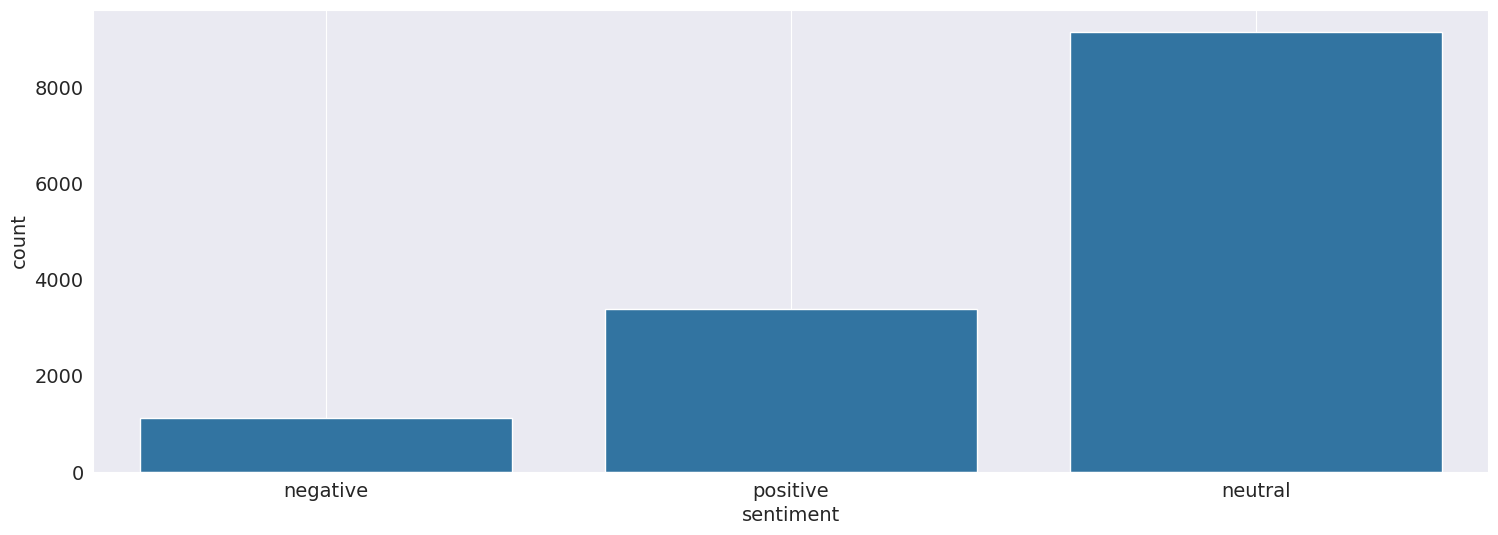

In [66]:
sns.countplot(x=df3['sentiment'])
plt.grid()

In [67]:
sentences=df3['message']
le=LabelEncoder()
df3['sentiment']= le.fit_transform(df3['sentiment'])

In [68]:
# Check the unique values in the sentiment column
unique_sentiments = df3['sentiment'].unique()
print(f"Unique sentiment values: {unique_sentiments}")


Unique sentiment values: [0 2 1]


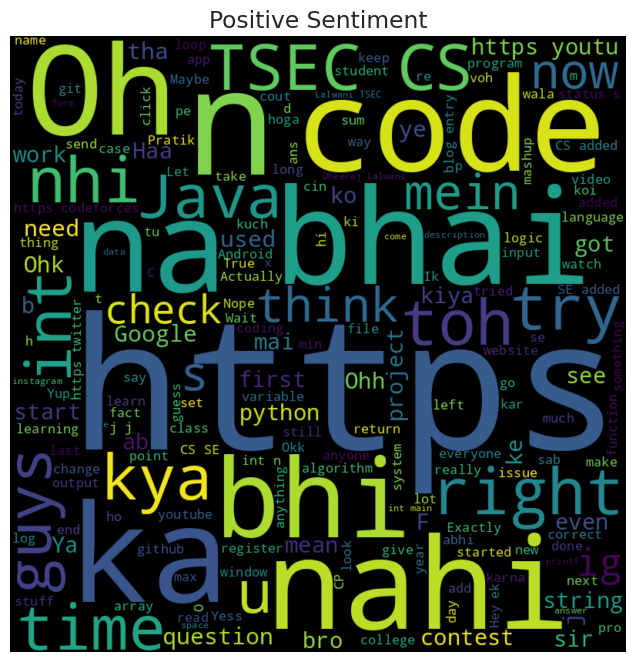

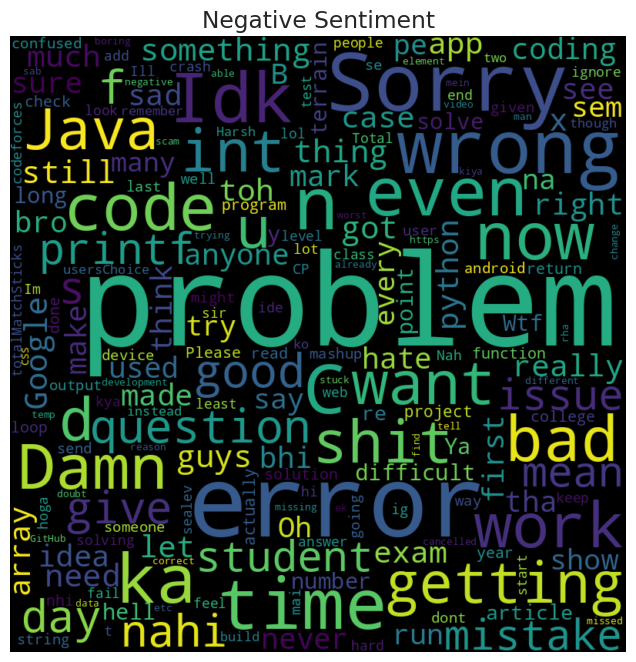

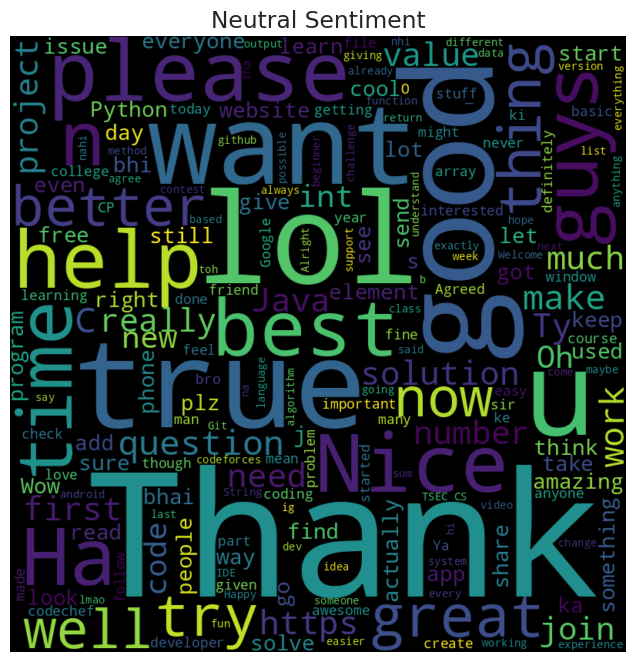

In [69]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Set of stopwords
stopwords = set(STOPWORDS)

# Ensure df3['sentiment'] contains expected sentiment labels
if not set(df3['sentiment']).issubset({1, 0, 2}):
    raise ValueError("Unexpected sentiment labels found in df3['sentiment']")

# Ensure sentences and df3 are aligned
if len(sentences) != len(df3):
    raise ValueError("Mismatch between length of sentences and df3")

# Prepare text for each sentiment category
pos_text = ' '.join(map(str, df3[df3['sentiment'] == 1]['message']))
neg_text = ' '.join(map(str, df3[df3['sentiment'] == 0]['message']))
neu_text = ' '.join(map(str, df3[df3['sentiment'] == 2]['message']))

# Function to generate and display word cloud
def generate_wordcloud(text, title, background_color='black'):
    if text.strip():
        wordcloud = WordCloud(width=800, height=800,
                              background_color=background_color,
                              stopwords=stopwords,
                              min_font_size=10).generate(text)
        plt.figure(figsize=(8, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        print(f"No words to display for {title} sentiment.")

# Generate word clouds for each sentiment
generate_wordcloud(pos_text, 'Positive Sentiment')
generate_wordcloud(neg_text, 'Negative Sentiment')
generate_wordcloud(neu_text, 'Neutral Sentiment')


In [ ]:
labels=to_categorical(df3['sentiment'],num_classes=3)
X_train,X_test,Y_train,Y_test = train_test_split(df3['message'],labels,test_size=0.1,random_state=10)

Data Cleaning

In this model I will be using Tf-Idf.It has a large vocabulary: these words are contractions, misspelled words, concatenated words or emojis which can decrease our model's performance. We will then use re library to remove these words from the dataset.¶

We will build vocabulary and count of each vocabulary using the below function

In [88]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

# Download NLTK data (only need to run this once)
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess messages
def preprocess_message(message):
    # Convert to lowercase
    message = message.lower()
    # Remove punctuation
    message = message.translate(str.maketrans('', '', string.punctuation))
    # Tokenize the message
    tokens = word_tokenize(message)
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Remove stopwords
    stopwords = set(ENGLISH_STOP_WORDS)
    cleaned_message = ' '.join([token for token in lemmatized_tokens if token not in stopwords])
    return cleaned_message

# Assuming df3 is already populated with the necessary data
# Example df3 structure
# df3 = pd.DataFrame({
#     'message': ["This is a sample message", "Another message here", ...],
#     'sentiment': [1, -1, ...]
# })

# Apply preprocessing to each message
df3['cleaned_message'] = df3['message'].apply(preprocess_message)

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df3['cleaned_message'])

# Convert to dense array (if necessary) and print
tfidf_array = tfidf_matrix.toarray()

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# Display the first 5 vectors
print(tfidf_array[:5])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


TF-IDF matrix shape: (13655, 8602)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df3['sentiment'], test_size=0.2, random_state=42)

In [80]:
# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [81]:
y_pred[:5]

array([2, 1, 1, 1, 1])

In [82]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.8495056755767119
Precision: 0.8324680650056785
Recall: 0.6276377542681137
F1 Score: 0.6646067568523142


In [83]:
# Print classification report
print(classification_report(y_test, y_pred))

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)

# Display the first 5 vectors
tfidf_array = tfidf_matrix.toarray()
print(tfidf_array[:5])

              precision    recall  f1-score   support

           0       0.78      0.18      0.30       214
           1       0.85      0.97      0.90      1843
           2       0.87      0.73      0.79       674

    accuracy                           0.85      2731
   macro avg       0.83      0.63      0.66      2731
weighted avg       0.85      0.85      0.83      2731

TF-IDF matrix shape: (13655, 8602)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


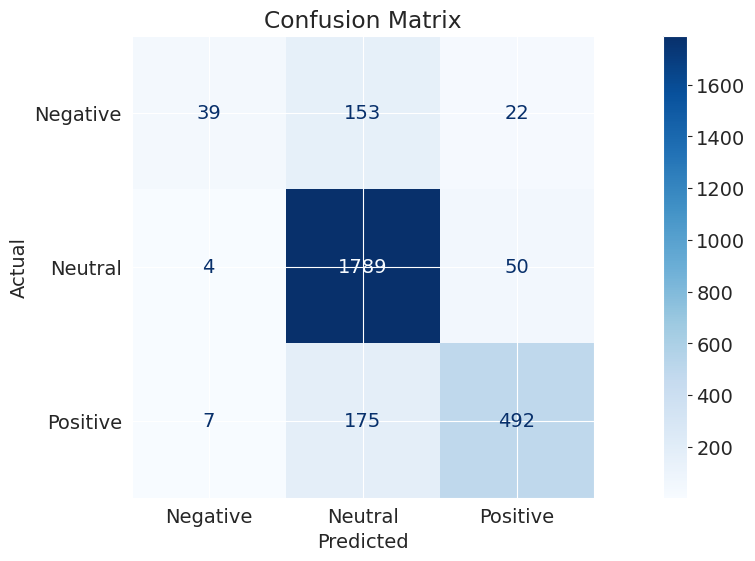

In [87]:
# Plotting the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot(cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

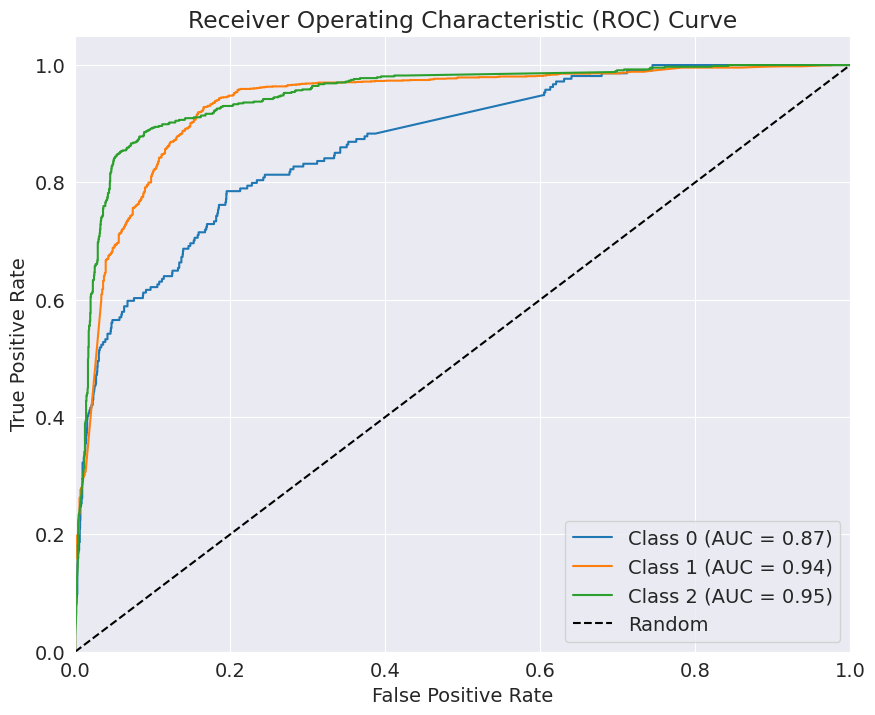

In [89]:
# Calculate probabilities for each class
probs = model.predict_proba(X_test)

# Calculate the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(model.classes_)):
    fpr[i], tpr[i], _ = roc_curve((y_test == model.classes_[i]).astype(int), probs[:, i])
    roc_auc[i] = roc_auc_score((y_test == model.classes_[i]).astype(int), probs[:, i])

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {model.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

To test the model on the DataFrame df3, you first need to preprocess the text data in the message column, vectorize it using the TF-IDF vectorizer (or any other vectorizer you used during training), and then use the trained model to predict the sentiment for each message. Here's how you can do it:

In [91]:
# Preprocess the text data in the 'message' column of df3
preprocessed_messages = preprocess_text(df3['message'])

# Vectorize the preprocessed messages using the TF-IDF vectorizer
X_test = vectorizer.transform(preprocessed_messages)

# Use the trained model to predict the sentiment for each message
predictions = model.predict(X_test)

# Add the predictions to df3 as a new column
df3['predicted_sentiment'] = predictions


In [92]:
df3

message  sentiment  \
0      Messages and calls are end-to-end encrypted. N...          0   
1      Tanay Kamath (TSEC, CS) created group "CODERS👨...          2   
2             You joined using this group's invite link           2   
3      +91 99871 38558 joined using this group's invi...          2   
4      +91 91680 38866 joined using this group's invi...          2   
...                                                  ...        ...   
13650                                    MCQs mark kiya           1   
13651                                    Sign-in kiya😂😅           1   
13652                                  Incognito se na?           1   
13653                                               Yup           1   
13654  guys, please do me a favor and vote in this po...          2   

                                         cleaned_message  predicted_sentiment  
0      message endtoend encrypted outside chat whatsa...                    1  
1       tanay kamath tsec c created group coders👨‍💻👩‍💻🖥💻                    1  
2                         joined using group invite link                    2  
3          91 99871 38558 joined using group invite link                    2  
4          91 91680 38866 joined using group invite link                    2  
...                                                  ...                  ...  
13650                                     mcqs mark kiya                    1  
13651                                      signin kiya😂😅                    1  
13652                                    incognito se na                    1  
13653                                                yup                    1  
13654  guy favor vote poll share thank httpstwitterco...                    1  

[13655 rows x 4 columns]

# *Thank You*
- [Tushar Nankani](https://www.linkedin.com/in/tusharnankani/)